#### **Default for File Path**

In [10]:
import importlib.util
import os

# Define the path to config.py
config_path = os.path.abspath(os.path.join(os.path.dirname(r'C:\Users\nilay\OneDrive - Cal State Fullerton (1)\Desktop\NILAY-TO-JOB-DATA\SPRING 2024\CPSC 597 Project\Stock-Price-Prediction'), 'Stock-Price-Prediction', 'config.py'))

# Load the module from the specified path
spec = importlib.util.spec_from_file_location("config", config_path)
config = importlib.util.module_from_spec(spec)
spec.loader.exec_module(config)

### **Run Till Model Creation [Based on O,H,L,C]**

In [11]:
import pandas as pd

file_path = os.path.join(config.BASE_DIR, 'dataset', 'INFY.NS.csv')
df = pd.read_csv(file_path)
df

c:\Users\nilay\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Date         Open         High          Low        Close  \
0     1996-01-01     0.794921     0.796679     0.791015     0.796679   
1     1996-01-02     0.794921     0.798828     0.793457     0.793457   
2     1996-01-03     0.798828     0.798828     0.798828     0.798828   
3     1996-01-04     0.791015     0.794921     0.791015     0.793554   
4     1996-01-05     0.784179     0.784179     0.784179     0.784179   
...          ...          ...          ...          ...          ...   
6496  2021-10-12  1677.000000  1689.000000  1662.000000  1685.150024   
6497  2021-10-13  1695.949951  1713.650024  1680.050049  1709.199951   
6498  2021-10-14  1754.000000  1783.599976  1698.199951  1715.750000   
6499  2021-10-18  1740.000000  1799.000000  1740.000000  1792.150024   
6500  2021-10-19  1814.000000  1834.500000  1782.300049  1822.150024   

        Adj Close      Volume  
0        0.549483    204800.0  
1        0.547260    204800.0  
2        0.550965    102400.0  
3        0.547327    307200.0  
4        0.540861     51200.0  
...           ...         ...  
6496  1685.150024   7439300.0  
6497  1709.199951   7104171.0  
6498  1715.750000  19655776.0  
6499  1792.150024  13438109.0  
6500  1822.150024  10324260.0  

[6501 rows x 7 columns]

In [12]:
df = df[['Date', 'Open', 'High', 'Low', 'Close']]
df

Date         Open         High          Low        Close
0     1996-01-01     0.794921     0.796679     0.791015     0.796679
1     1996-01-02     0.794921     0.798828     0.793457     0.793457
2     1996-01-03     0.798828     0.798828     0.798828     0.798828
3     1996-01-04     0.791015     0.794921     0.791015     0.793554
4     1996-01-05     0.784179     0.784179     0.784179     0.784179
...          ...          ...          ...          ...          ...
6496  2021-10-12  1677.000000  1689.000000  1662.000000  1685.150024
6497  2021-10-13  1695.949951  1713.650024  1680.050049  1709.199951
6498  2021-10-14  1754.000000  1783.599976  1698.199951  1715.750000
6499  2021-10-18  1740.000000  1799.000000  1740.000000  1792.150024
6500  2021-10-19  1814.000000  1834.500000  1782.300049  1822.150024

[6501 rows x 5 columns]

In [13]:
# to convert date from string to datetime
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\nilay\AppData\Local\Temp\ipykernel_13168\3967493437.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1996-01-01
1      1996-01-02
2      1996-01-03
3      1996-01-04
4      1996-01-05
          ...    
6496   2021-10-12
6497   2021-10-13
6498   2021-10-14
6499   2021-10-18
6500   2021-10-19
Name: Date, Length: 6501, dtype: datetime64[ns]

In [14]:
df.index = df.pop('Date')
df

Open         High          Low        Close
Date                                                          
1996-01-01     0.794921     0.796679     0.791015     0.796679
1996-01-02     0.794921     0.798828     0.793457     0.793457
1996-01-03     0.798828     0.798828     0.798828     0.798828
1996-01-04     0.791015     0.794921     0.791015     0.793554
1996-01-05     0.784179     0.784179     0.784179     0.784179
...                 ...          ...          ...          ...
2021-10-12  1677.000000  1689.000000  1662.000000  1685.150024
2021-10-13  1695.949951  1713.650024  1680.050049  1709.199951
2021-10-14  1754.000000  1783.599976  1698.199951  1715.750000
2021-10-18  1740.000000  1799.000000  1740.000000  1792.150024
2021-10-19  1814.000000  1834.500000  1782.300049  1822.150024

[6501 rows x 4 columns]

In [15]:
# Assuming df is your DataFrame
df.dropna(axis=0, inplace=True)

C:\Users\nilay\AppData\Local\Temp\ipykernel_13168\2231426680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace=True)


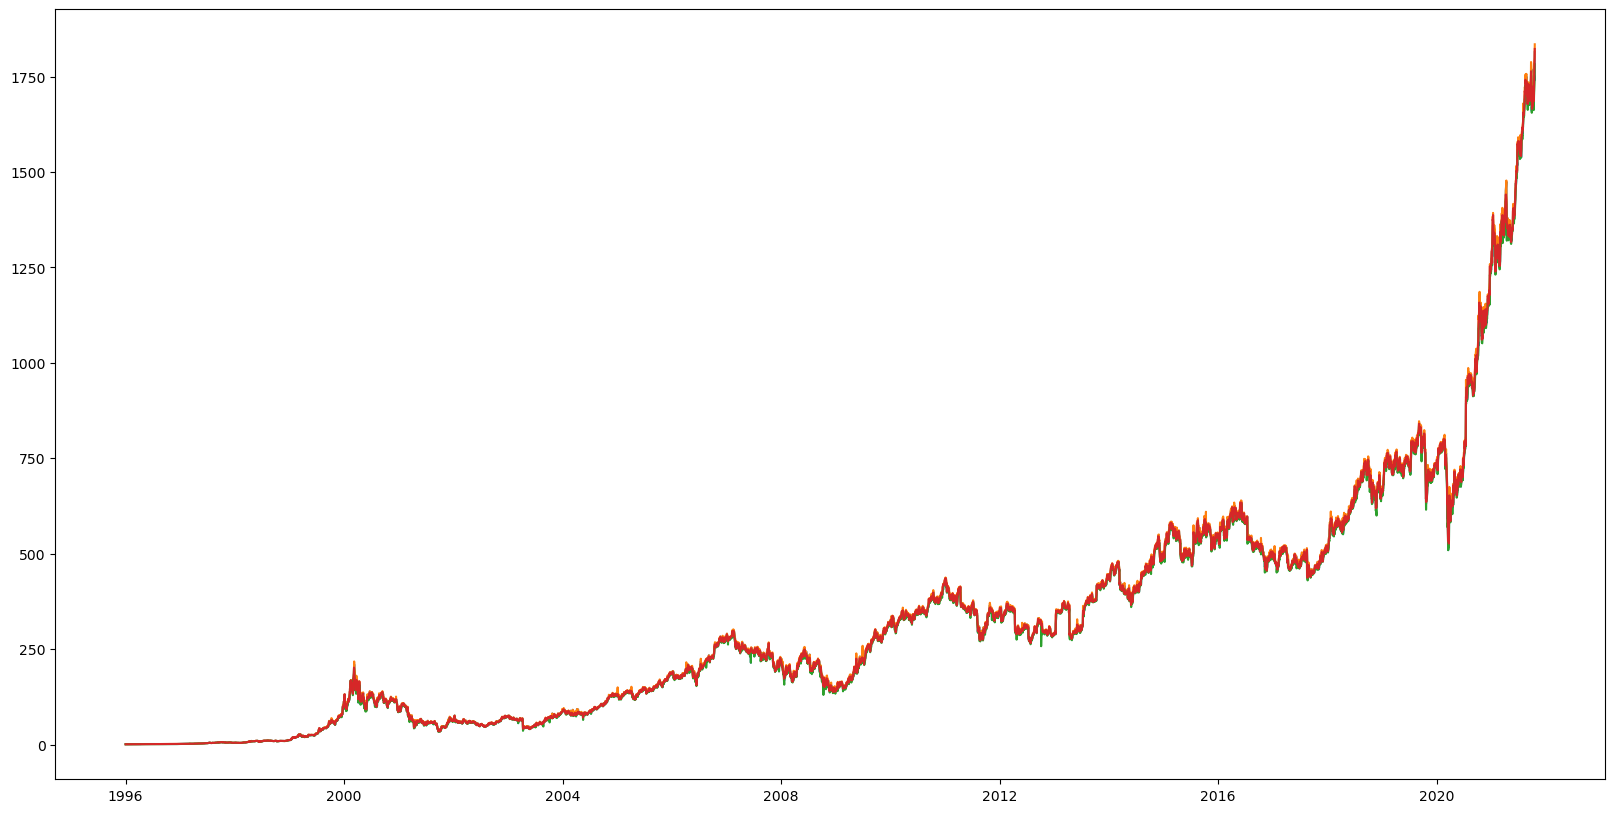

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(df.index, df['Open'])
plt.plot(df.index, df['High'])
plt.plot(df.index, df['Low'])
plt.plot(df.index, df['Close'])

In [18]:
import pandas as pd
import numpy as np
import datetime

# Redefine str_to_datetime function to handle different date formats if needed
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

# Function to create a windowed dataframe
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X_open, X_high, X_low, X_close, Y_open, Y_high, Y_low, Y_close = [], [], [], [], [], [], [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        open_values = df_subset['Open'].to_numpy()
        high_values = df_subset['High'].to_numpy()
        low_values = df_subset['Low'].to_numpy()
        close_values = df_subset['Close'].to_numpy()

        X_open.append(open_values[:-1])
        Y_open.append(open_values[-1])
        
        X_high.append(high_values[:-1])
        Y_high.append(high_values[-1])
        
        X_low.append(low_values[:-1])
        Y_low.append(low_values[-1])
        
        X_close.append(close_values[:-1])
        Y_close.append(close_values[-1])

        dates.append(target_date)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year, month, day = map(int, next_date_str.split('-'))
        next_date = datetime.datetime(year=year, month=month, day=day)

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X_open = np.array(X_open)
    X_high = np.array(X_high)
    X_low = np.array(X_low)
    X_close = np.array(X_close)

    for i in range(n):
        ret_df[f'Open-{n-i}'] = X_open[:, i]
        ret_df[f'High-{n-i}'] = X_high[:, i]
        ret_df[f'Low-{n-i}'] = X_low[:, i]
        ret_df[f'Close-{n-i}'] = X_close[:, i]

    ret_df['Open-Target'] = Y_open
    ret_df['High-Target'] = Y_high
    ret_df['Low-Target'] = Y_low
    ret_df['Close-Target'] = Y_close

    return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2010-01-04', 
                                '2018-01-01', 
                                n=100)
windowed_df

C:\Users\nilay\AppData\Local\Temp\ipykernel_13168\2573285670.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df[f'Close-{n-i}'] = X_close[:, i]
C:\Users\nilay\AppData\Local\Temp\ipykernel_13168\2573285670.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df[f'Open-{n-i}'] = X_open[:, i]
C:\Users\nilay\AppData\Local\Temp\ipykernel_13168\2573285670.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

Target Date    Open-100    High-100     Low-100   Close-100     Open-99  \
0     2010-01-04  245.037506  249.737503  243.024994  248.087494  248.281250   
1     2010-01-05  248.281250  252.750000  248.281250  251.743744  253.987503   
2     2010-01-06  253.987503  259.875000  253.337494  258.043762  258.000000   
3     2010-01-07  258.000000  261.674988  256.018738  259.556244  260.000000   
4     2010-01-08  260.000000  260.931244  252.625000  255.468750  257.462494   
...          ...         ...         ...         ...         ...         ...   
1969  2017-12-26  505.500000  508.500000  499.174988  502.774994  503.000000   
1970  2017-12-27  503.000000  506.375000  493.600006  496.674988  495.500000   
1971  2017-12-28  495.500000  499.375000  490.125000  492.000000  494.000000   
1972  2017-12-29  494.000000  494.500000  488.024994  491.875000  491.750000   
1973  2018-01-01  491.750000  491.875000  482.850006  484.125000  484.250000   

         High-99      Low-99    Close-99     Open-98  ...       Low-2  \
0     252.750000  248.281250  251.743744  253.987503  ...  309.593750   
1     259.875000  253.337494  258.043762  258.000000  ...  312.100006   
2     261.674988  256.018738  259.556244  260.000000  ...  324.412506   
3     260.931244  252.625000  255.468750  257.462494  ...  325.012512   
4     263.375000  257.462494  262.325012  262.500000  ...  321.887512   
...          ...         ...         ...         ...  ...         ...   
1969  506.375000  493.600006  496.674988  495.500000  ...  499.200012   
1970  499.375000  490.125000  492.000000  494.000000  ...  508.000000   
1971  494.500000  488.024994  491.875000  491.750000  ...  511.500000   
1972  491.875000  482.850006  484.125000  484.250000  ...  513.700012   
1973  485.125000  477.524994  481.924988  483.825012  ...  511.899994   

         Close-2      Open-1      High-1       Low-1     Close-1  Open-Target  \
0     313.762512  314.987488  316.262512  312.100006  312.799988   326.250000   
1     312.799988  326.250000  328.750000  324.412506  326.575012   327.500000   
2     326.575012  327.500000  328.837494  325.012512  327.668762   335.375000   
3     327.668762  335.375000  335.375000  321.887512  322.887512   323.325012   
4     322.887512  323.325012  323.325012  314.774994  315.631256   314.875000   
...          ...         ...         ...         ...         ...          ...   
1969  511.024994  508.000000  522.400024  508.000000  519.674988   515.000000   
1970  519.674988  515.000000  520.750000  511.500000  517.799988   514.000000   
1971  517.799988  514.000000  519.549988  513.700012  517.125000   515.000000   
1972  517.125000  515.000000  520.000000  511.899994  516.625000   515.049988   
1973  516.625000  515.049988  524.400024  515.000000  521.025024   518.849976   

      High-Target  Low-Target  Close-Target  
0      328.750000  324.412506    326.575012  
1      328.837494  325.012512    327.668762  
2      335.375000  321.887512    322.887512  
3      323.325012  314.774994    315.631256  
4      315.412506  307.250000    308.024994  
...           ...         ...           ...  
1969   520.750000  511.500000    517.799988  
1970   519.549988  513.700012    517.125000  
1971   520.000000  511.899994    516.625000  
1972   524.400024  515.000000    521.025024  
1973   522.250000  515.000000    516.775024  

[1974 rows x 405 columns]

In [19]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, 0]

    # Extract the features (Open, High, Low, Close) from the columns
    middle_matrix = df_as_np[:, 1:-4]
    # Reshape the features matrix to include the multiple feature sets
    # Each row has n Open, High, Low, and Close values
    num_features = 4  # We have Open, High, Low, Close
    n = (middle_matrix.shape[1] // num_features)  # Number of time steps (n=3 in this case)
    X = middle_matrix.reshape((len(dates), n, num_features))

    # Extract the target values (Open-Target, High-Target, Low-Target, Close-Target)
    Y_open = df_as_np[:, -4]
    Y_high = df_as_np[:, -3]
    Y_low = df_as_np[:, -2]
    Y_close = df_as_np[:, -1]

    # Combine all target values into a single array
    Y = np.stack((Y_open, Y_high, Y_low, Y_close), axis=-1)

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((1974,), (1974, 100, 4), (1974, 4))

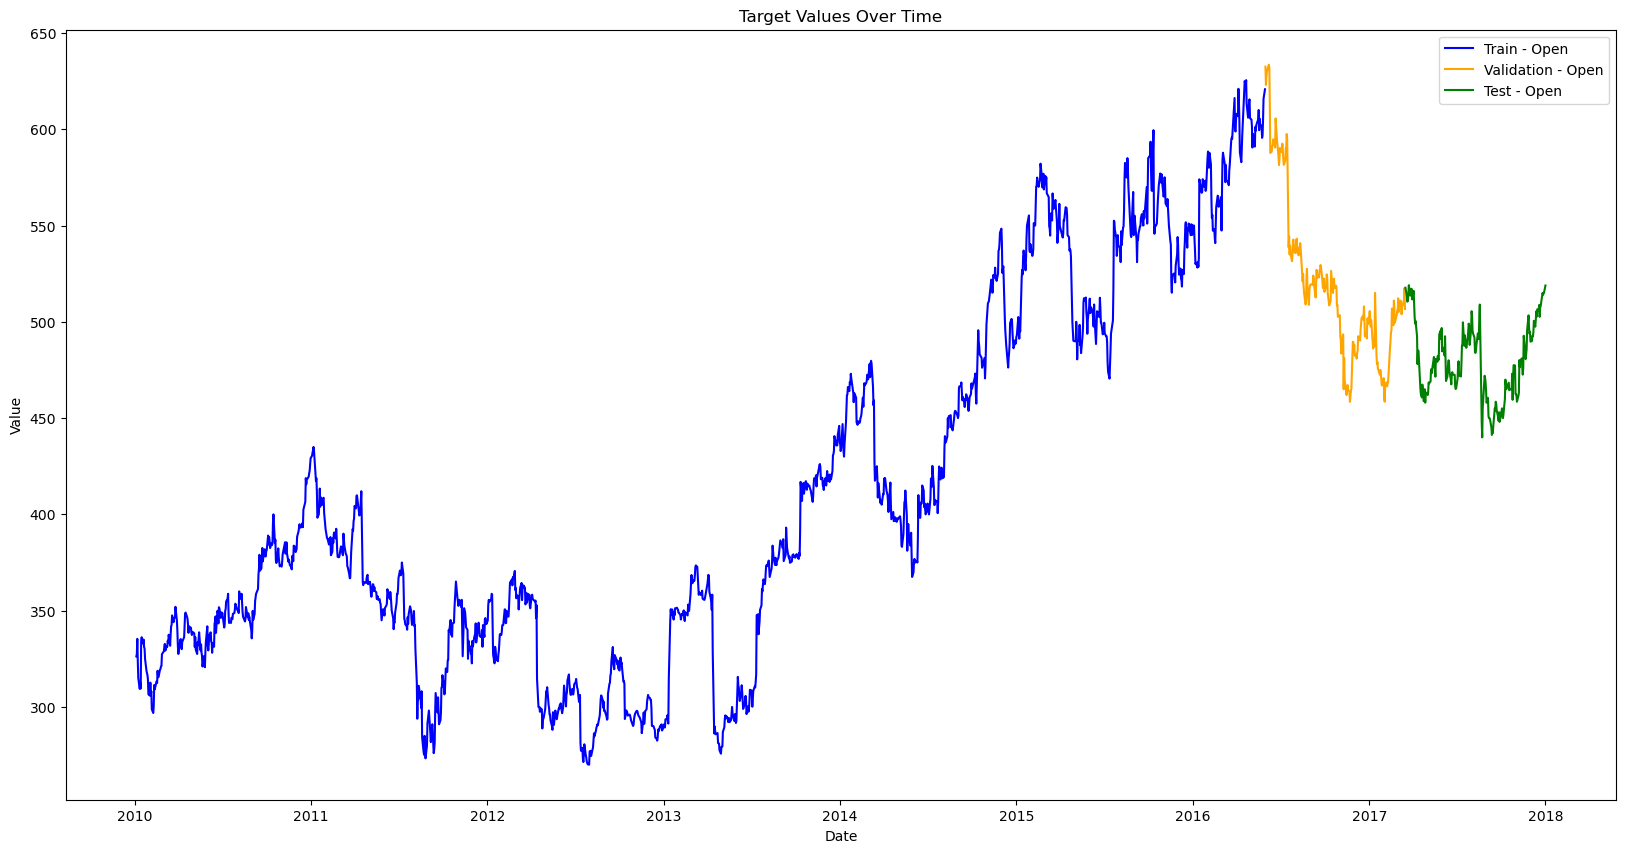

In [20]:
import matplotlib.pyplot as plt

q_80 = int(len(dates) * .80)
q_90 = int(len(dates) * .90)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize=(20, 10))

# Plotting target values for each feature set
plt.plot(dates_train, y_train[:, 0], label='Train - Open', color='blue')
plt.plot(dates_val, y_val[:, 0], label='Validation - Open', color='orange')
plt.plot(dates_test, y_test[:, 0], label='Test - Open', color='green')

plt.legend()
plt.title('Target Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

plt.show()

In [492]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential([
    layers.Input((3, 4)),
    layers.LSTM(256),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4)
])

# Compile the model
model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.0001),
              metrics=['mean_absolute_error'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=5, 
                               restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, 
          validation_data=(X_val, y_val), 
          epochs=100, 
          callbacks=[early_stopping])


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 199ms/step - loss: 172786.3594 - mean_absolute_error: 405.5257 - val_loss: 270468.5000 - val_mean_absolute_error: 518.3784
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - loss: 172223.5781 - mean_absolute_error: 404.2686 - val_loss: 268602.8125 - val_mean_absolute_error: 516.5764
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - loss: 168241.0156 - mean_absolute_error: 400.1228 - val_loss: 265801.4375 - val_mean_absolute_error: 513.8573
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 222ms/step - loss: 164131.5469 - mean_absolute_error: 394.4817 - val_loss: 261886.5625 - val_mean_absolute_error: 510.0305
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - loss: 163887.7812 - mean_absolute_error: 393.9379 - val_loss: 256108.9531 - val_mean_absolute_error: 504.3232
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - loss: 160864.9688 - mean_absolute_error: 390.0139 - val_loss: 248534.3594 - val_mean_absolute_error: 496.7334
Epoc

In [23]:
train_predictions = model.predict(X_train)

50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step


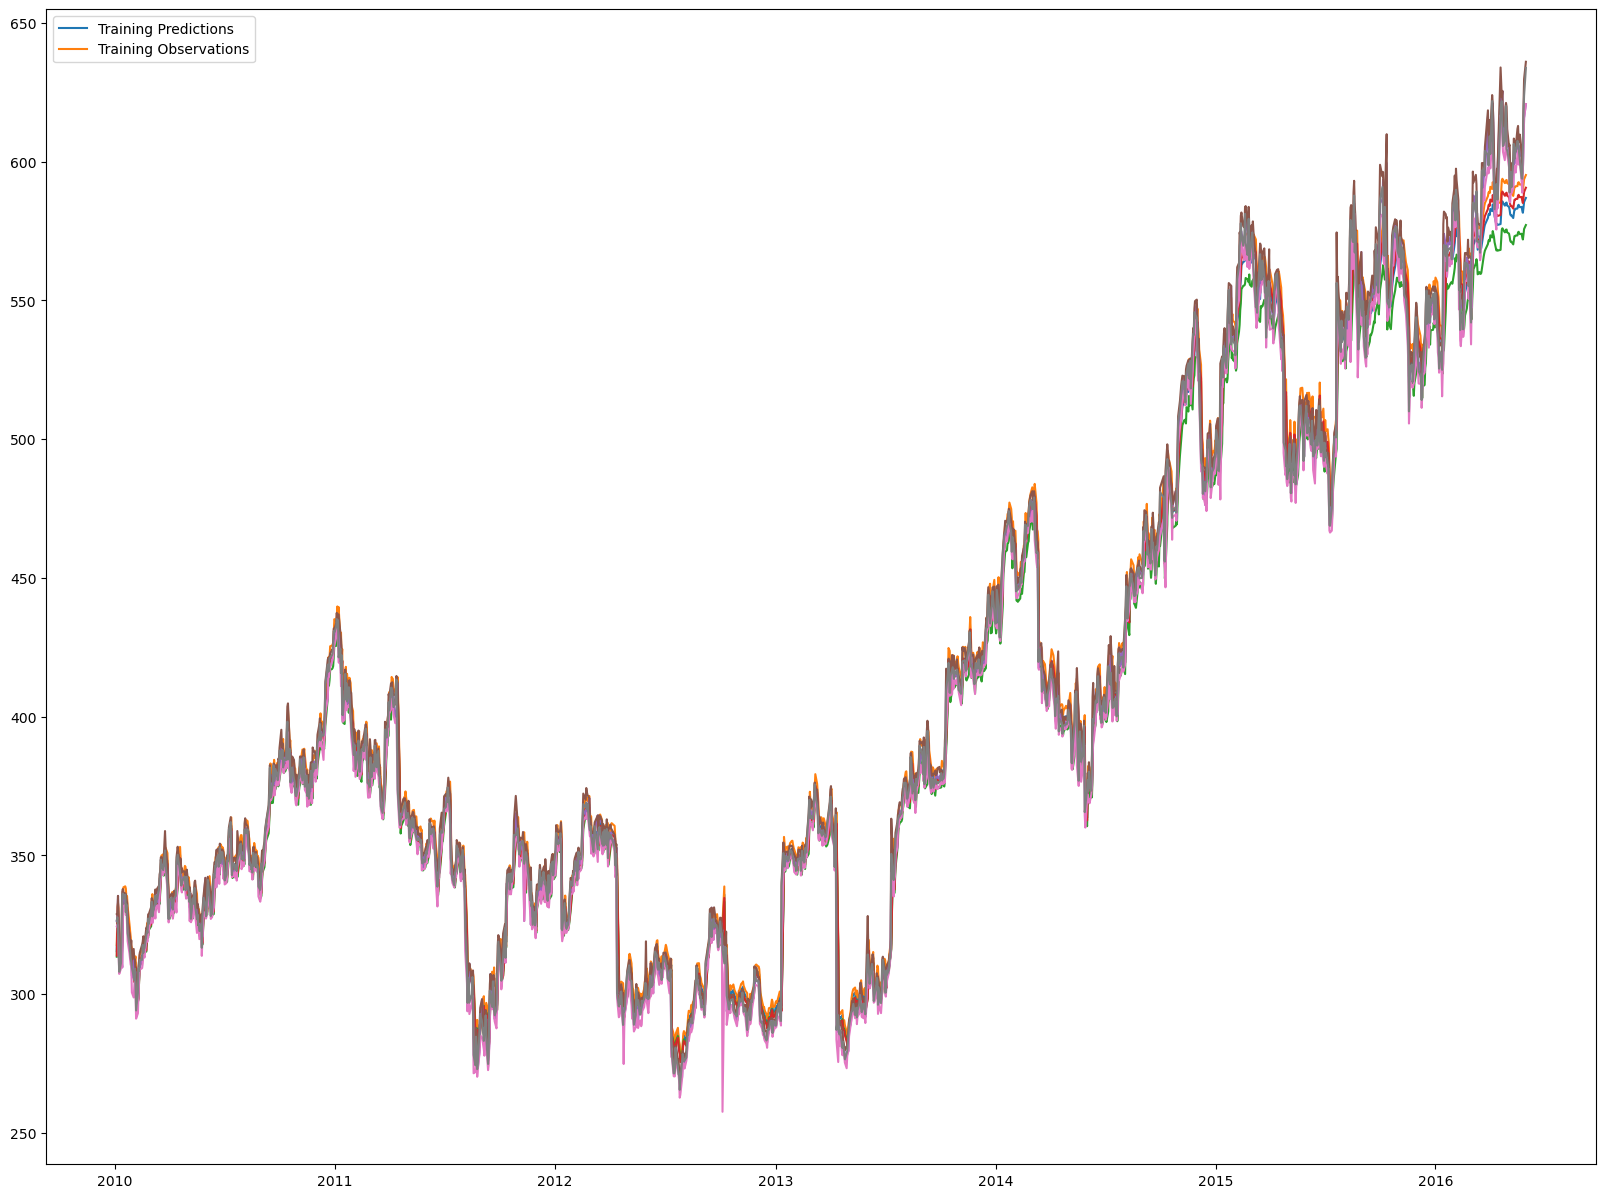

In [24]:

plt.figure(figsize=(20,15))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [25]:
val_predictions = model.predict(X_val)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


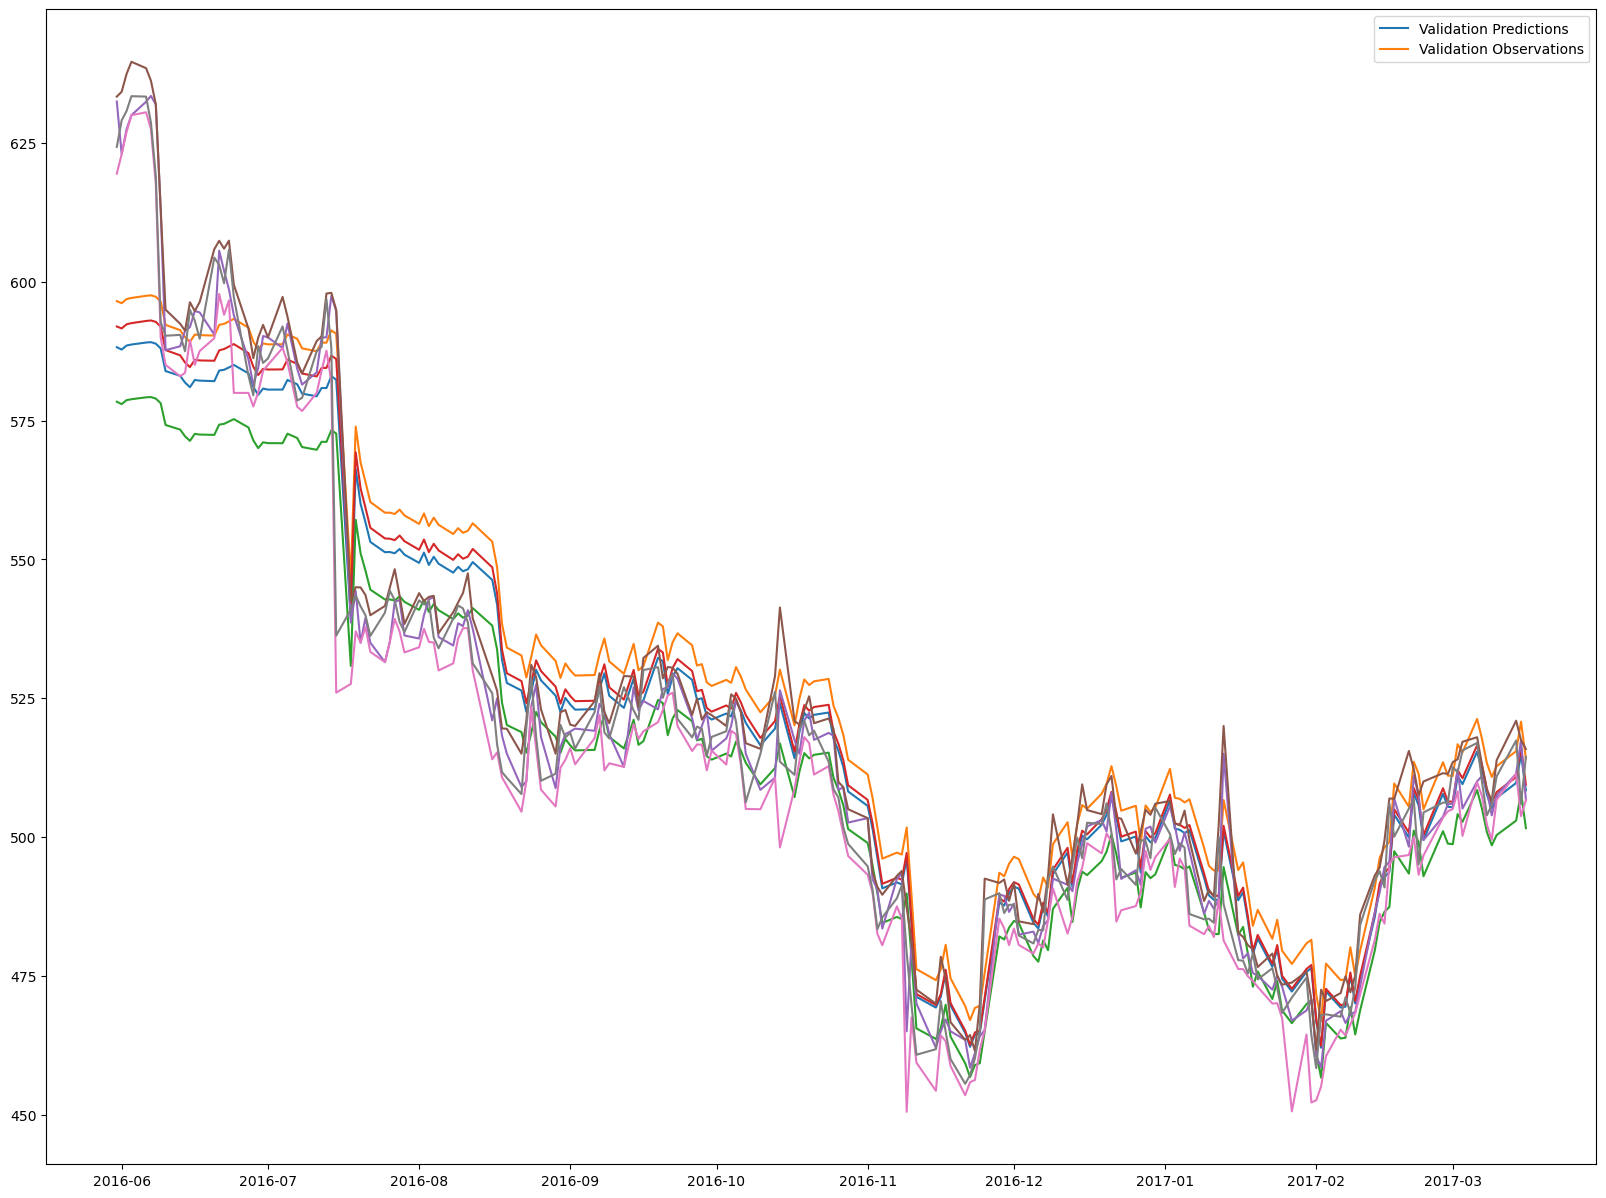

In [26]:
plt.figure(figsize=(20,15))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

In [27]:
test_predictions = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


In [28]:
test_predictions.shape

(198, 4)

In [29]:
dates_test.shape

(198,)

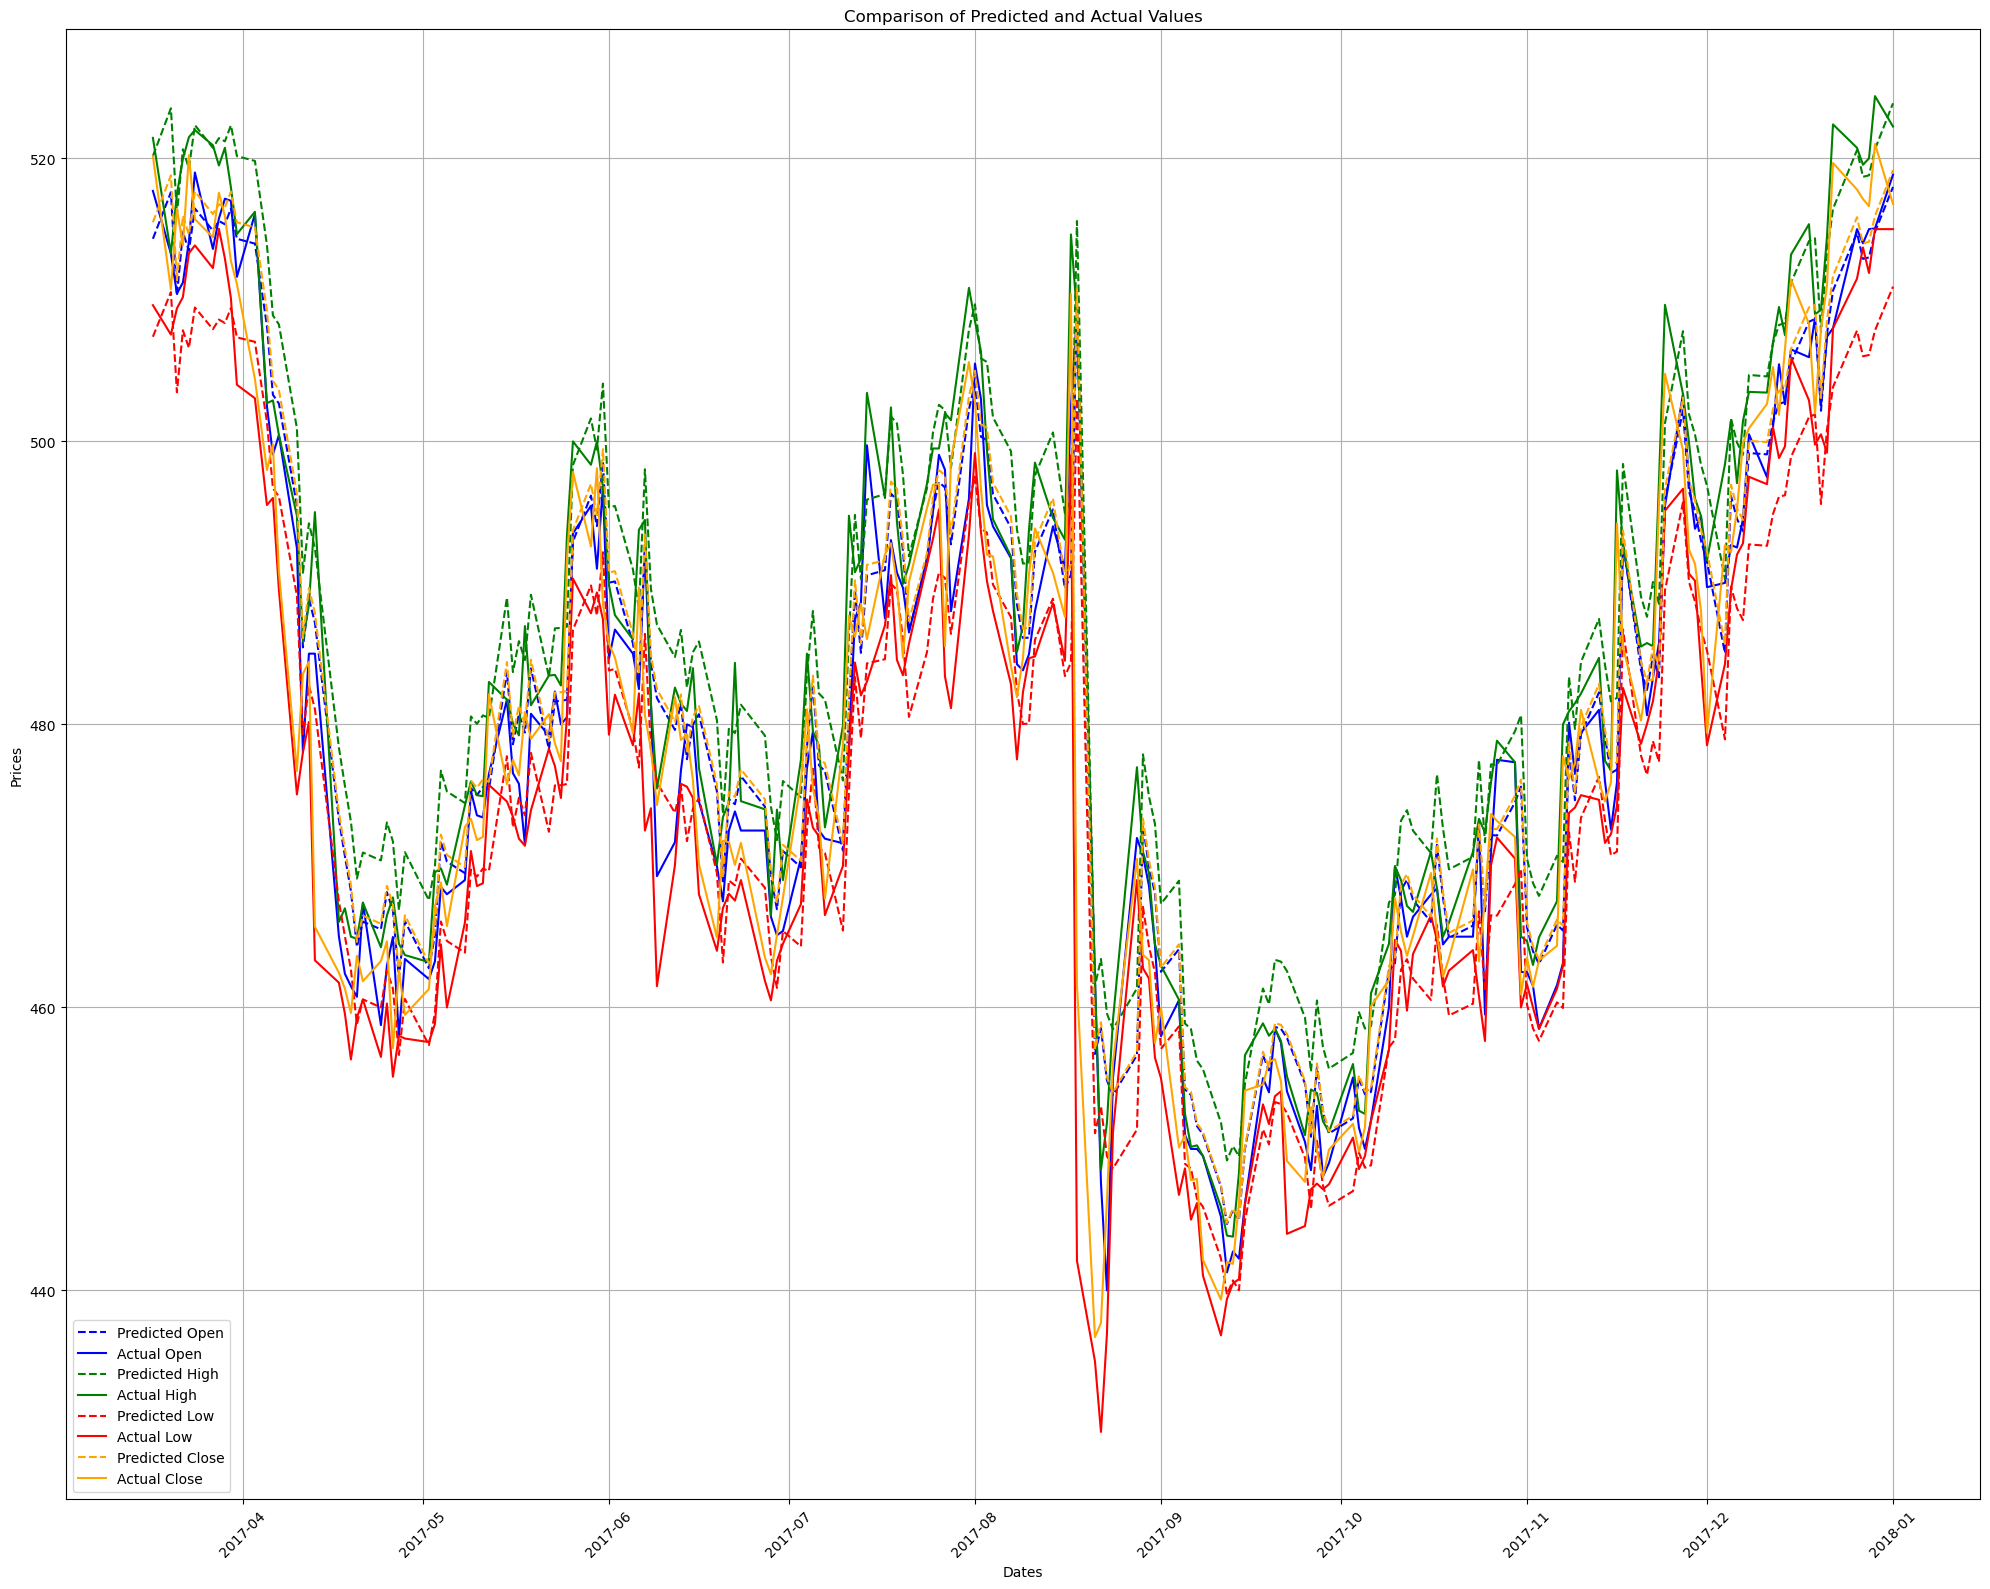

In [261]:
# Dictionary to map index to category
dict_i = {
    0: 'Open',
    1: 'High',
    2: 'Low',
    3: 'Close'
}

# Plotting
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed

# Define colors for each category (Open, High, Low, Close)
colors = ['blue', 'green', 'red', 'orange', 'blue', 'green', 'red', 'orange']

for i in range(4):  # Iterate through Open, High, Low, Close
    plt.plot(dates_test, test_predictions[:, i], label=f'Predicted {dict_i[i]}', linestyle='--', color=colors[i])
    plt.plot(dates_test, y_test[:, i], label=f'Actual {dict_i[i]}', linestyle='-', color=colors[i+4])

plt.title('Comparison of Predicted and Actual Values')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [31]:
test_predictions[50]

array([498.57892, 504.0863 , 492.16827, 499.4488 ], dtype=float32)

In [32]:
test_predictions.shape

(198, 4)

In [33]:
y_test[50]

array([496.775, 496.775, 487.425, 488.525], dtype=float32)

In [34]:
y_test.shape

(198, 4)

In [35]:
dates_test[50]

Timestamp('2017-05-31 00:00:00')

In [36]:
dates_test.shape

(198,)

#### **Metrics for Proper Visualization**

In [46]:
from tabulate import tabulate

# Preparing the table data for predicted values
predicted_table_data = []
for i in [0, 6, 13]:
    date = dates_test[i]
    pred_open, pred_high, pred_low, pred_close = test_predictions[i]
    
    predicted_table_data.append([date, pred_open, pred_high, pred_low, pred_close])

# Define table headers for predicted values
predicted_headers = ["Date", "Predicted Open", "Predicted High", "Predicted Low", "Predicted Close"]

# Print the table for predicted values
print(tabulate(predicted_table_data, headers=predicted_headers, tablefmt="grid", floatfmt=".2f"))

# Predicting the values for the next 14 Days after 2017-03-16

+---------------------+------------------+------------------+-----------------+-------------------+
| Date                |   Predicted Open |   Predicted High |   Predicted Low |   Predicted Close |
+=====================+==================+==================+=================+===================+
| 2017-03-17 00:00:00 |           514.32 |           520.17 |          507.40 |            515.48 |
+---------------------+------------------+------------------+-----------------+-------------------+
| 2017-03-27 00:00:00 |           514.90 |           520.75 |          507.93 |            516.07 |
+---------------------+------------------+------------------+-----------------+-------------------+
| 2017-04-06 00:00:00 |           503.30 |           508.90 |          496.68 |            504.28 |
+---------------------+------------------+------------------+-----------------+-------------------+


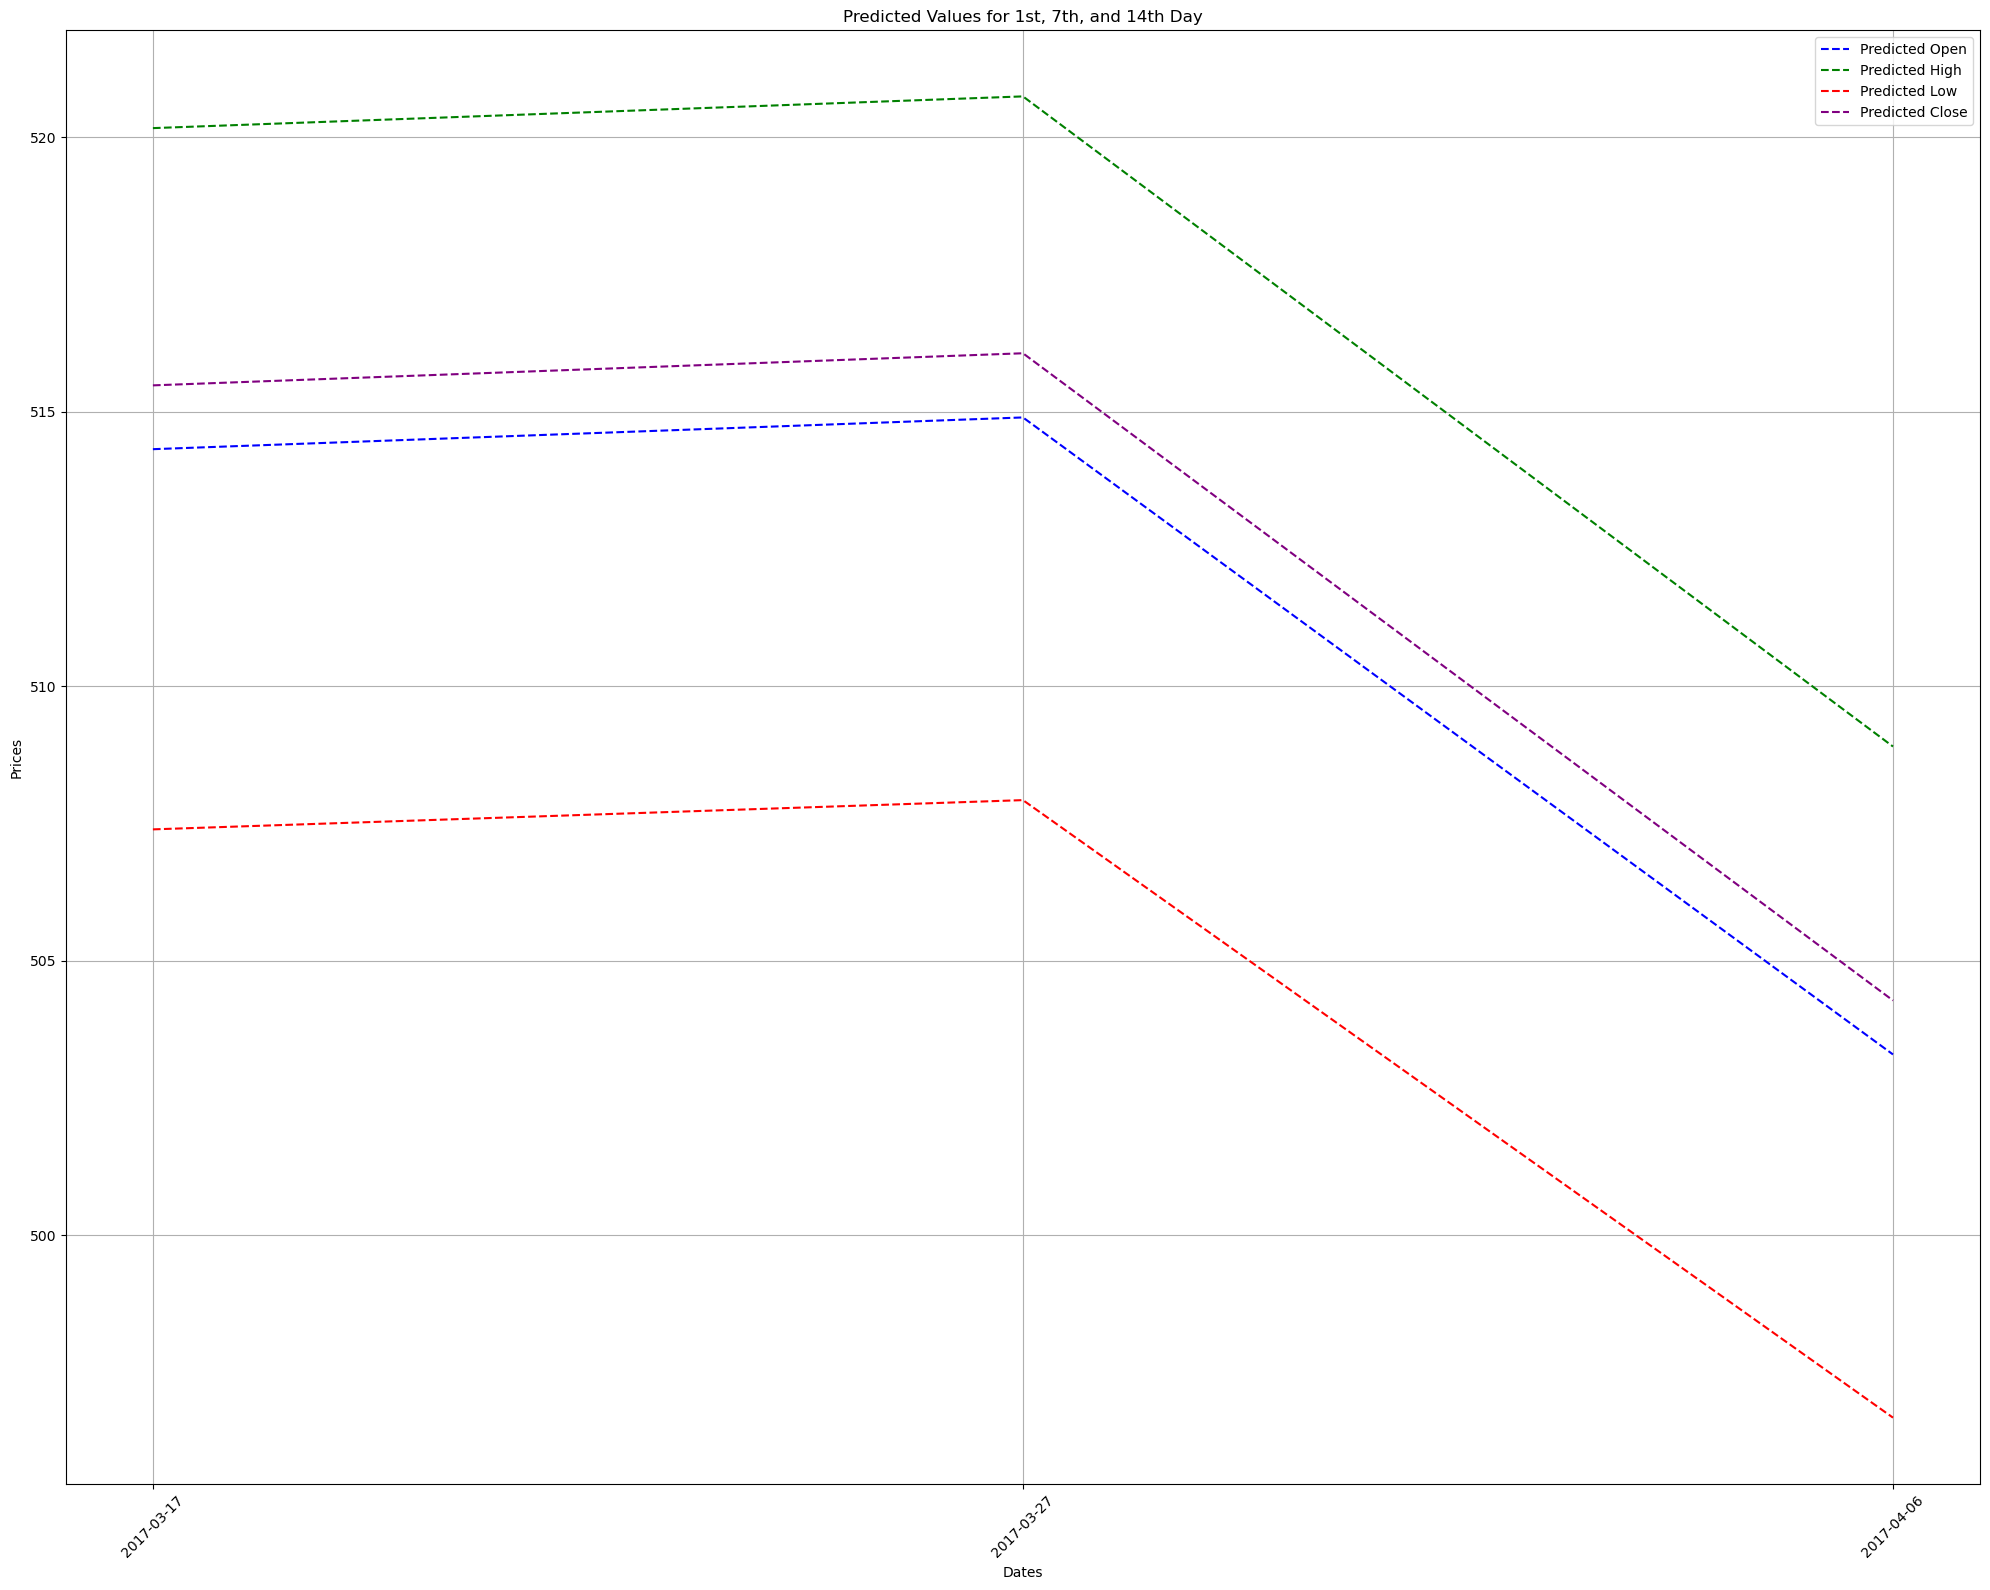

In [57]:
import matplotlib.pyplot as plt

# Dictionary to map index to category
dict_i = {
    0: 'Open',
    1: 'High',
    2: 'Low',
    3: 'Close'
}

# Define colors for each category (Open, High, Low, Close)
colors = ['blue', 'green', 'red', 'purple']

# Indices for the 1st, 7th, and 14th days
selected_days = [0, 6, 13]

# Create the figure
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed

# Plot predicted values for selected days
for i in range(4):  # Iterate through Open, High, Low, Close
    plt.plot(
        [dates_test[j] for j in selected_days],
        [test_predictions[j, i] for j in selected_days],
        label=f'Predicted {dict_i[i]}',
        linestyle='--',
        color=colors[i]
    )

plt.title('Predicted Values for 1st, 7th, and 14th Day')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks([dates_test[j] for j in selected_days], rotation=45)  # Ensure all dates are displayed and rotated for readability
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [38]:
from tabulate import tabulate

# Preparing the table data for predicted values
predicted_table_data = []
for i in range(14):
    date = dates_test[i]
    pred_open, pred_high, pred_low, pred_close = test_predictions[i]
    
    predicted_table_data.append([date, pred_open, pred_high, pred_low, pred_close])

# Define table headers for predicted values
predicted_headers = ["Date", "Predicted Open", "Predicted High", "Predicted Low", "Predicted Close"]

# Print the table for predicted values
print(tabulate(predicted_table_data, headers=predicted_headers, tablefmt="grid", floatfmt=".2f"))

# Predicting the values for the next 14 Days after 2017-03-16

+---------------------+------------------+------------------+-----------------+-------------------+
| Date                |   Predicted Open |   Predicted High |   Predicted Low |   Predicted Close |
+=====================+==================+==================+=================+===================+
| 2017-03-17 00:00:00 |           514.32 |           520.17 |          507.40 |            515.48 |
+---------------------+------------------+------------------+-----------------+-------------------+
| 2017-03-20 00:00:00 |           517.61 |           523.54 |          510.55 |            518.80 |
+---------------------+------------------+------------------+-----------------+-------------------+
| 2017-03-21 00:00:00 |           510.29 |           516.04 |          503.48 |            511.38 |
+---------------------+------------------+------------------+-----------------+-------------------+
| 2017-03-22 00:00:00 |           514.79 |           520.64 |          507.85 |            515.96 |


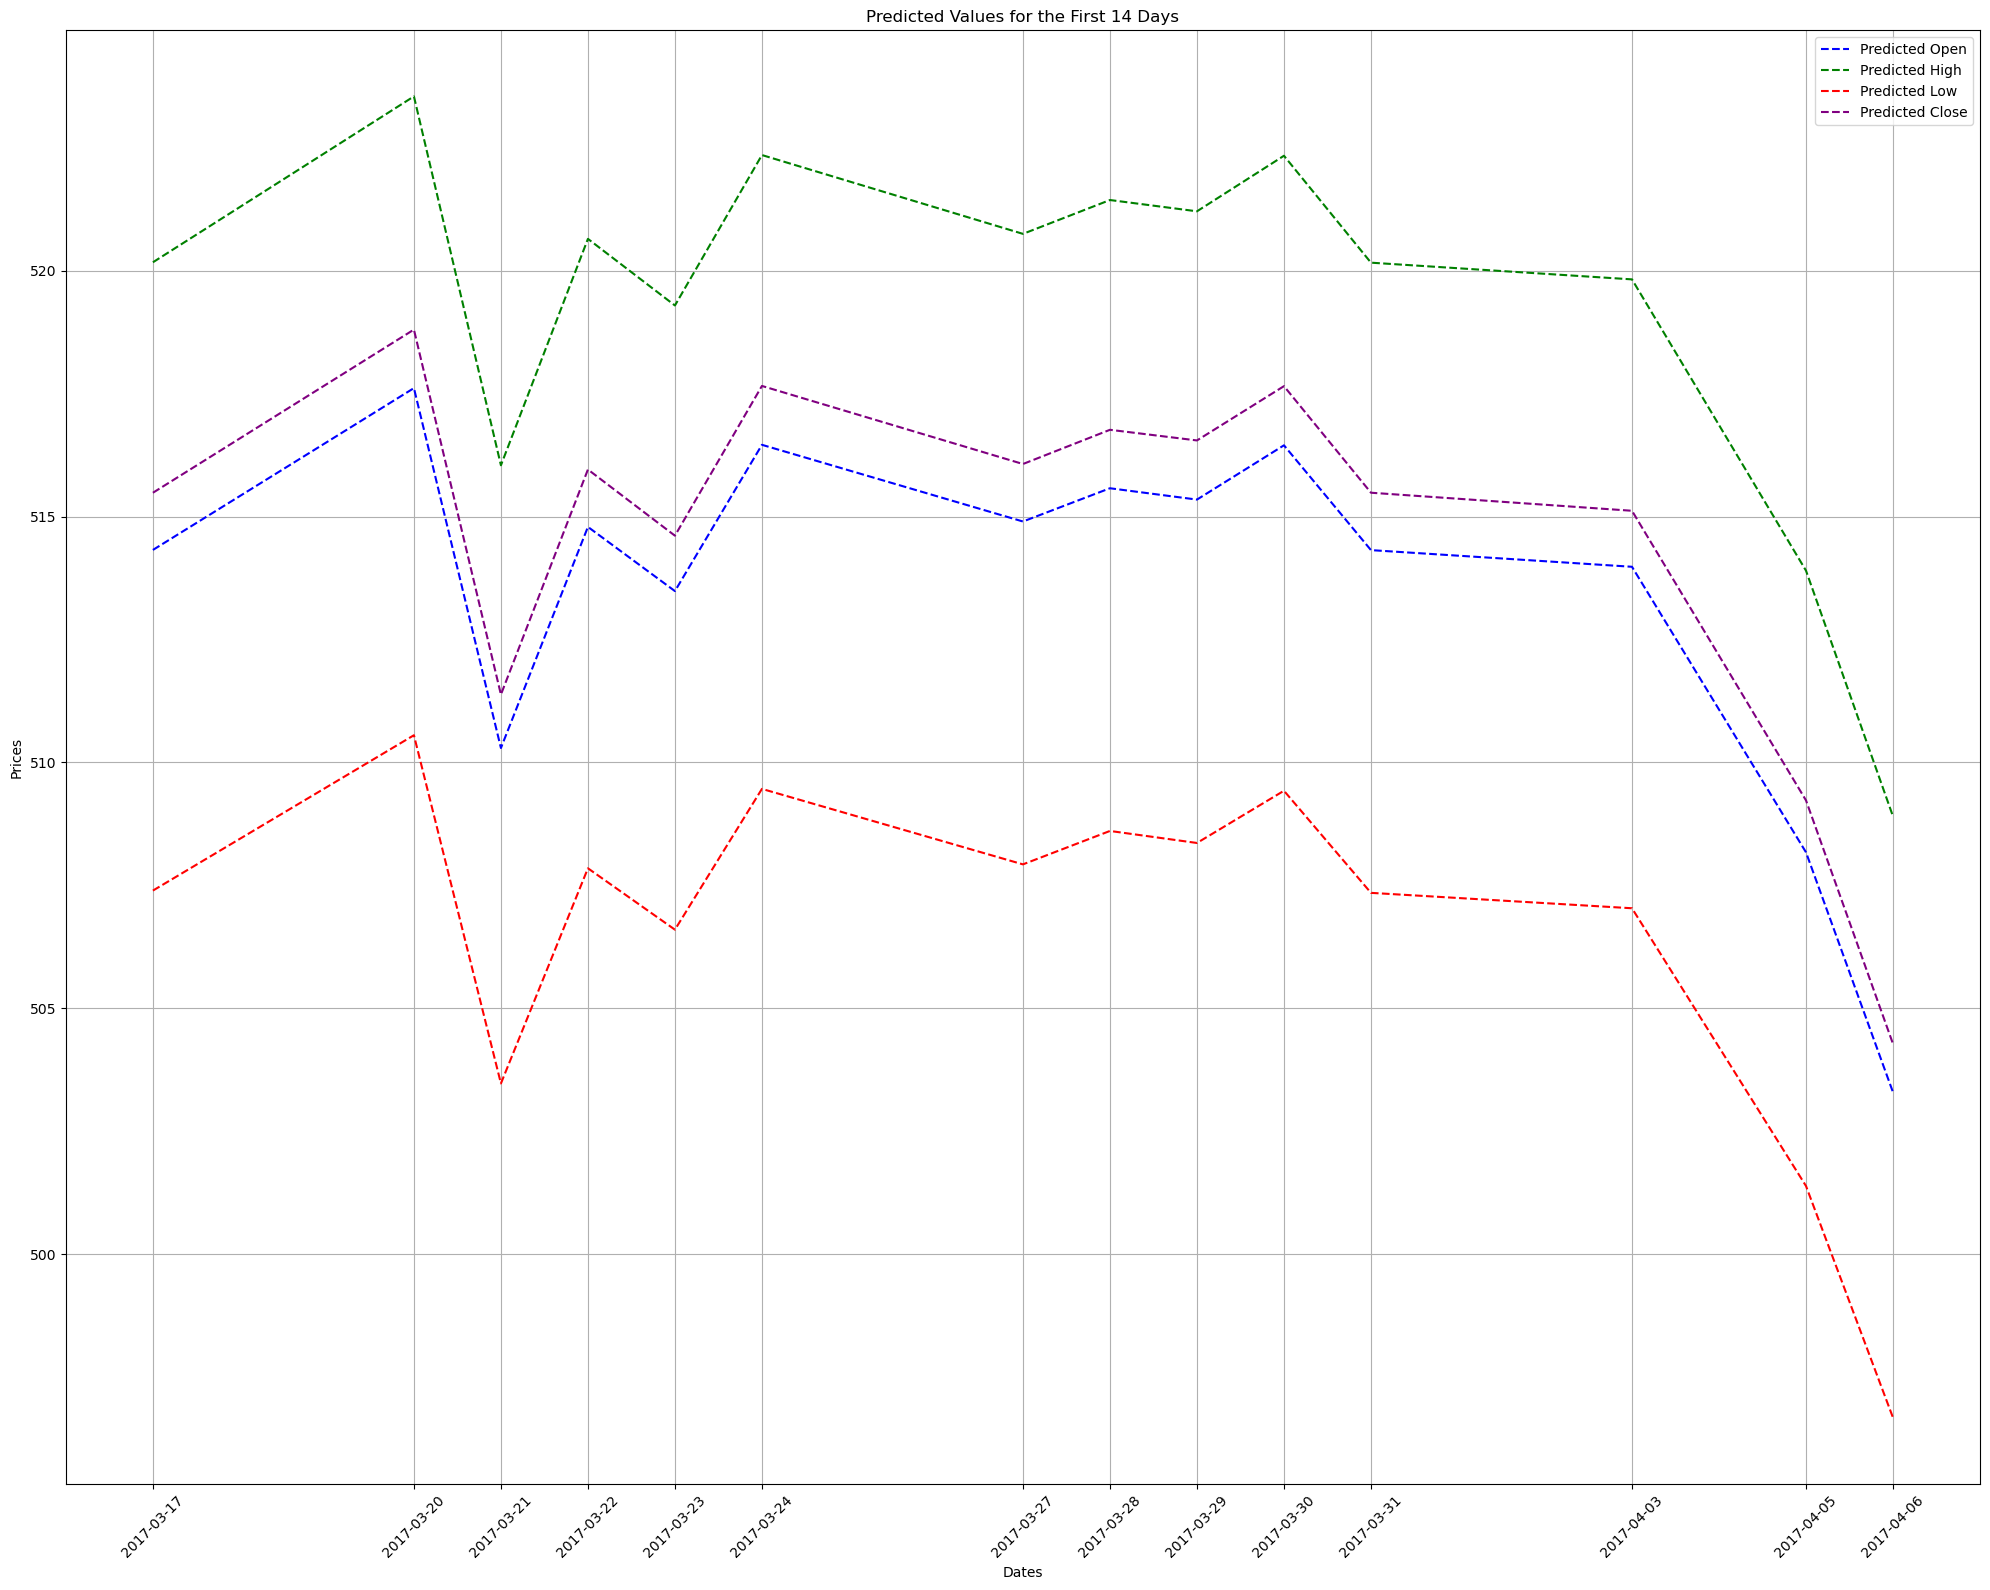

In [56]:
import matplotlib.pyplot as plt

# Dictionary to map index to category
dict_i = {
    0: 'Open',
    1: 'High',
    2: 'Low',
    3: 'Close'
}

# Define colors for each category (Open, High, Low, Close)
colors = ['blue', 'green', 'red', 'purple']

# Indices for the first 14 days (0 to 13)
selected_days = list(range(14))

# Create the figure
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed

# Plot predicted values for the first 14 days
for i in range(4):  # Iterate through Open, High, Low, Close
    plt.plot(
        [dates_test[j] for j in selected_days],
        [test_predictions[j, i] for j in selected_days],
        label=f'Predicted {dict_i[i]}',
        linestyle='--',
        color=colors[i]
    )

plt.title('Predicted Values for the First 14 Days')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks([dates_test[j] for j in selected_days], rotation=45)  # Ensure all dates are displayed and rotated for readability
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [48]:
from tabulate import tabulate

# Function to calculate delta and delta percentage
def calculate_delta(pred, actual):
    delta = pred - actual
    delta_percent = (delta / actual) * 100
    return delta, delta_percent

# Preparing the table data
table_data = []
for i in [0, 6, 13]:
    date = dates_test[i]
    pred_open, pred_high, pred_low, pred_close = test_predictions[i]
    act_open, act_high, act_low, act_close = y_test[i]
    
    delta_open, delta_open_percent = calculate_delta(pred_open, act_open)
    delta_high, delta_high_percent = calculate_delta(pred_high, act_high)
    delta_low, delta_low_percent = calculate_delta(pred_low, act_low)
    delta_close, delta_close_percent = calculate_delta(pred_close, act_close)
    
    table_data.append([date, pred_open, act_open, delta_open, delta_open_percent,
                       pred_high, act_high, delta_high, delta_high_percent,
                       pred_low, act_low, delta_low, delta_low_percent,
                       pred_close, act_close, delta_close, delta_close_percent])

# Define table headers
headers = ["Date", "Predicted Open", "Actual Open", "Delta Open", "Delta Open%", 
           "Predicted High", "Actual High", "Delta High", "Delta High%", 
           "Predicted Low", "Actual Low", "Delta Low", "Delta Low%", 
           "Predicted Close", "Actual Close", "Delta Close", "Delta Close%"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid", floatfmt=".2f"))

+---------------------+------------------+---------------+--------------+---------------+------------------+---------------+--------------+---------------+-----------------+--------------+-------------+--------------+-------------------+----------------+---------------+----------------+
| Date                |   Predicted Open |   Actual Open |   Delta Open |   Delta Open% |   Predicted High |   Actual High |   Delta High |   Delta High% |   Predicted Low |   Actual Low |   Delta Low |   Delta Low% |   Predicted Close |   Actual Close |   Delta Close |   Delta Close% |
+=====================+==================+===============+==============+===============+==================+===============+==============+===============+=================+==============+=============+==============+===================+================+===============+================+
| 2017-03-17 00:00:00 |           514.32 |        517.70 |        -3.38 |         -0.65 |           520.17 |        521.45 |        -1.2

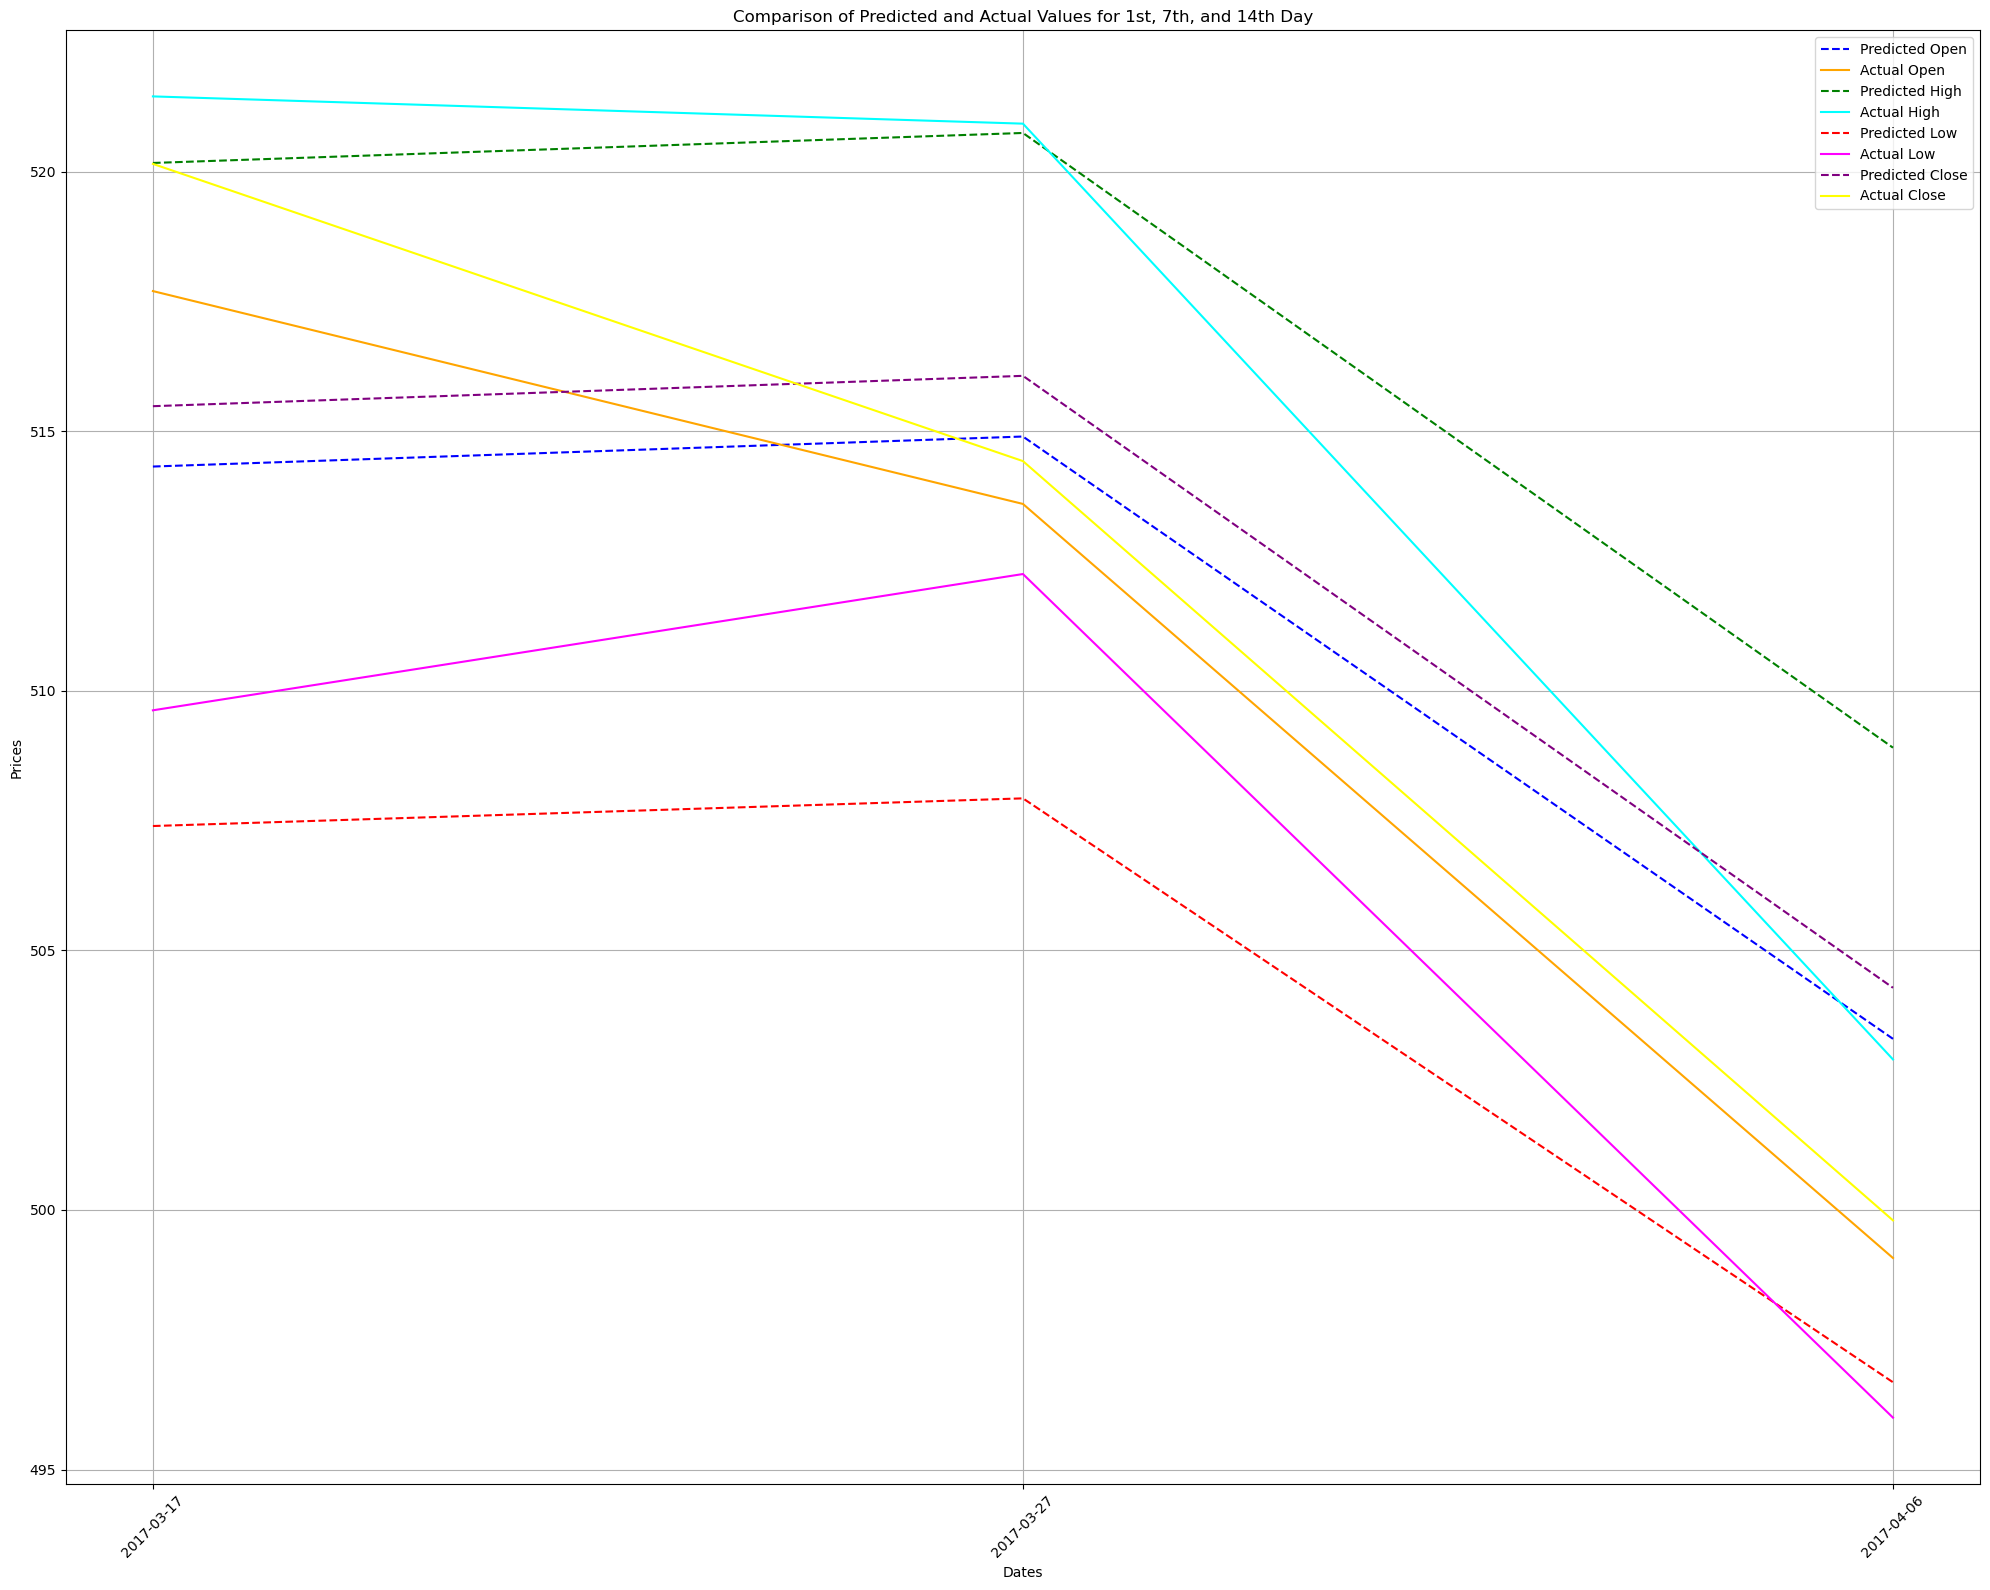

In [55]:
import matplotlib.pyplot as plt

# Dictionary to map index to category
dict_i = {
    0: 'Open',
    1: 'High',
    2: 'Low',
    3: 'Close'
}

# Define colors for each category (Open, High, Low, Close)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow']

# Indices for the 1st, 7th, and 14th days
selected_days = [0, 6, 13]

# Create the figure
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed

# Plot predicted and actual values for selected days
for i in range(4):  # Iterate through Open, High, Low, Close
    plt.plot(
        [dates_test[j] for j in selected_days],
        [test_predictions[j, i] for j in selected_days],
        label=f'Predicted {dict_i[i]}',
        linestyle='--',
        color=colors[i]
    )
    plt.plot(
        [dates_test[j] for j in selected_days],
        [y_test[j, i] for j in selected_days],
        label=f'Actual {dict_i[i]}',
        linestyle='-',
        color=colors[i + 4]
    )

plt.title('Comparison of Predicted and Actual Values for 1st, 7th, and 14th Day')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks([dates_test[j] for j in selected_days], rotation=45)  # Ensure all dates are displayed and rotated for readability
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [50]:
from tabulate import tabulate

# Function to calculate delta and delta percentage
def calculate_delta(pred, actual):
    delta = pred - actual
    delta_percent = (delta / actual) * 100
    return delta, delta_percent

# Preparing the table data
table_data = []
for i in range(14):
    date = dates_test[i]
    pred_open, pred_high, pred_low, pred_close = test_predictions[i]
    act_open, act_high, act_low, act_close = y_test[i]
    
    delta_open, delta_open_percent = calculate_delta(pred_open, act_open)
    delta_high, delta_high_percent = calculate_delta(pred_high, act_high)
    delta_low, delta_low_percent = calculate_delta(pred_low, act_low)
    delta_close, delta_close_percent = calculate_delta(pred_close, act_close)
    
    table_data.append([date, pred_open, act_open, delta_open, delta_open_percent,
                       pred_high, act_high, delta_high, delta_high_percent,
                       pred_low, act_low, delta_low, delta_low_percent,
                       pred_close, act_close, delta_close, delta_close_percent])

# Define table headers
headers = ["Date", "Predicted Open", "Actual Open", "Delta Open", "Delta Open%", 
           "Predicted High", "Actual High", "Delta High", "Delta High%", 
           "Predicted Low", "Actual Low", "Delta Low", "Delta Low%", 
           "Predicted Close", "Actual Close", "Delta Close", "Delta Close%"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid", floatfmt=".2f"))

+---------------------+------------------+---------------+--------------+---------------+------------------+---------------+--------------+---------------+-----------------+--------------+-------------+--------------+-------------------+----------------+---------------+----------------+
| Date                |   Predicted Open |   Actual Open |   Delta Open |   Delta Open% |   Predicted High |   Actual High |   Delta High |   Delta High% |   Predicted Low |   Actual Low |   Delta Low |   Delta Low% |   Predicted Close |   Actual Close |   Delta Close |   Delta Close% |
+=====================+==================+===============+==============+===============+==================+===============+==============+===============+=================+==============+=============+==============+===================+================+===============+================+
| 2017-03-17 00:00:00 |           514.32 |        517.70 |        -3.38 |         -0.65 |           520.17 |        521.45 |        -1.2

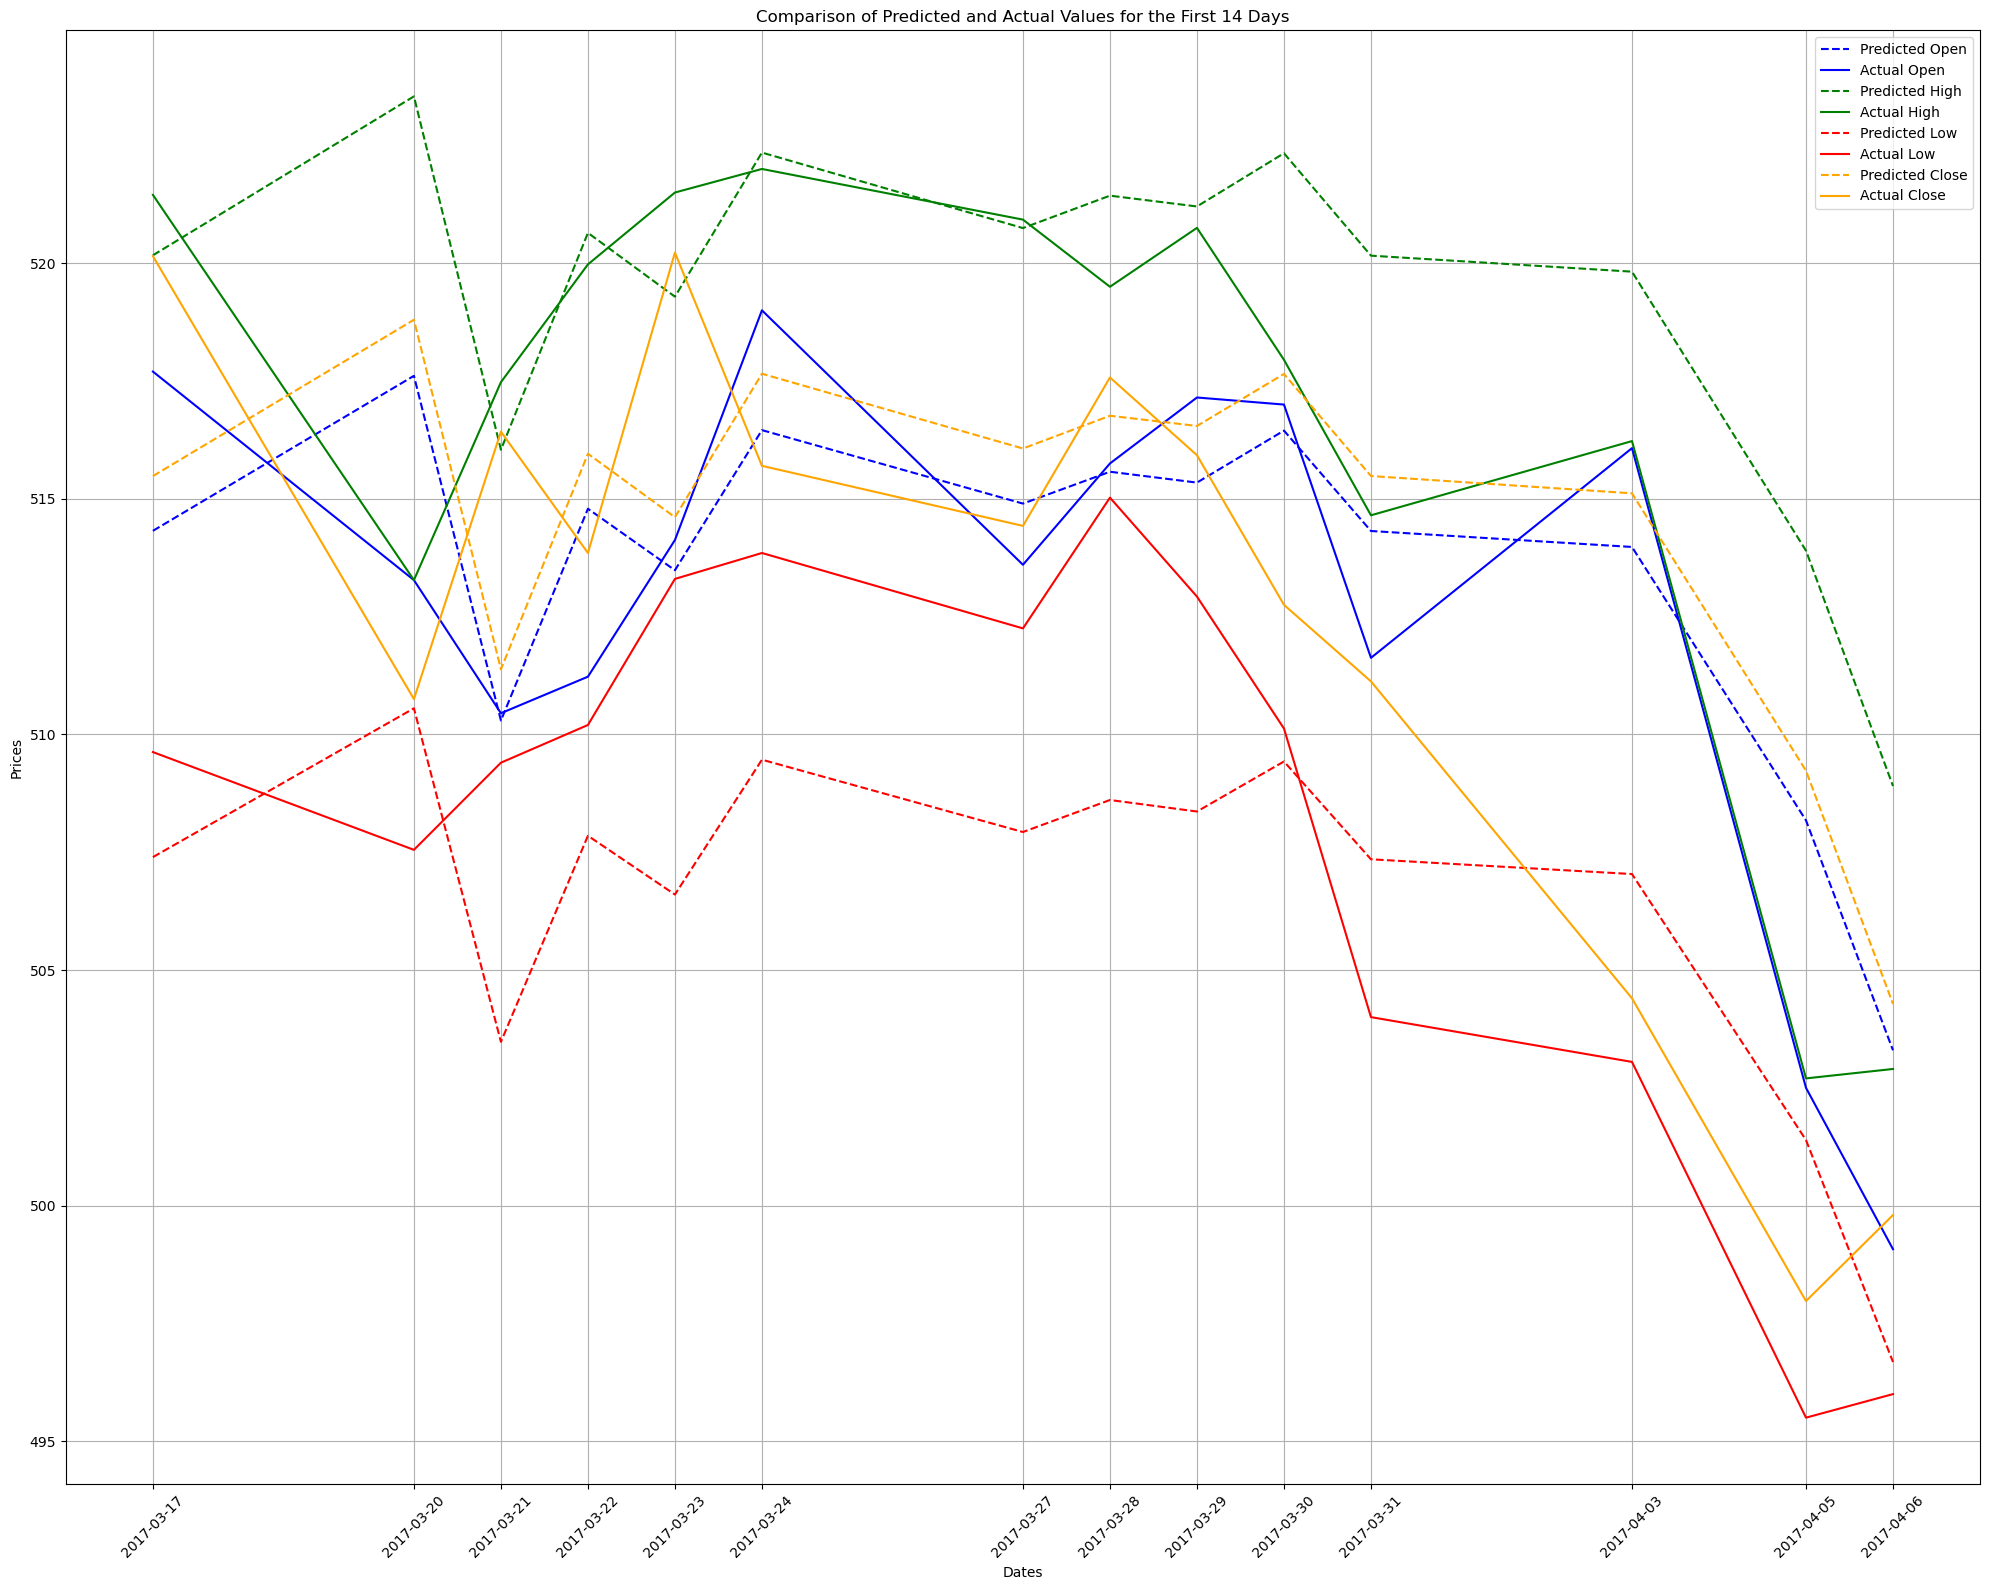

In [58]:
import matplotlib.pyplot as plt

# Dictionary to map index to category
dict_i = {
    0: 'Open',
    1: 'High',
    2: 'Low',
    3: 'Close'
}

# Define colors for each category (Open, High, Low, Close)
colors = ['blue', 'green', 'red', 'orange', 'blue', 'green', 'red', 'orange']

# Indices for the first 14 days (0 to 13)
selected_days = list(range(14))

# Create the figure
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed

# Plot predicted and actual values for the first 14 days
for i in range(4):  # Iterate through Open, High, Low, Close
    plt.plot(
        [dates_test[j] for j in selected_days],
        [test_predictions[j, i] for j in selected_days],
        label=f'Predicted {dict_i[i]}',
        linestyle='--',
        color=colors[i]
    )
    plt.plot(
        [dates_test[j] for j in selected_days],
        [y_test[j, i] for j in selected_days],
        label=f'Actual {dict_i[i]}',
        linestyle='-',
        color=colors[i + 4]
    )

plt.title('Comparison of Predicted and Actual Values for the First 14 Days')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks([dates_test[j] for j in selected_days], rotation=45)  # Ensure all dates are displayed and rotated for readability
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

#### **Checking For 1st, 14th, 28th Days**

In [445]:
dates_test

array([Timestamp('2017-03-17 00:00:00'), Timestamp('2017-03-20 00:00:00'),
       Timestamp('2017-03-21 00:00:00'), Timestamp('2017-03-22 00:00:00'),
       Timestamp('2017-03-23 00:00:00'), Timestamp('2017-03-24 00:00:00'),
       Timestamp('2017-03-27 00:00:00'), Timestamp('2017-03-28 00:00:00'),
       Timestamp('2017-03-29 00:00:00'), Timestamp('2017-03-30 00:00:00'),
       Timestamp('2017-03-31 00:00:00'), Timestamp('2017-04-03 00:00:00'),
       Timestamp('2017-04-05 00:00:00'), Timestamp('2017-04-06 00:00:00'),
       Timestamp('2017-04-07 00:00:00'), Timestamp('2017-04-10 00:00:00'),
       Timestamp('2017-04-11 00:00:00'), Timestamp('2017-04-12 00:00:00'),
       Timestamp('2017-04-13 00:00:00'), Timestamp('2017-04-17 00:00:00'),
       Timestamp('2017-04-18 00:00:00'), Timestamp('2017-04-19 00:00:00'),
       Timestamp('2017-04-20 00:00:00'), Timestamp('2017-04-21 00:00:00'),
       Timestamp('2017-04-24 00:00:00'), Timestamp('2017-04-25 00:00:00'),
       Timestamp('2017-04

In [446]:
y_test

array([[517.7  , 521.45 , 509.625, 520.15 ],
       [513.275, 513.275, 507.55 , 510.75 ],
       [510.45 , 517.475, 509.4  , 516.425],
       [511.225, 519.975, 510.2  , 513.85 ],
       [514.125, 521.5  , 513.3  , 520.225],
       [519.   , 522.   , 513.85 , 515.7  ],
       [513.6  , 520.925, 512.25 , 514.425],
       [515.75 , 519.5  , 515.025, 517.575],
       [517.15 , 520.75 , 512.925, 515.925],
       [517.   , 517.95 , 510.125, 512.75 ],
       [511.625, 514.65 , 504.   , 511.125],
       [516.075, 516.225, 503.05 , 504.4  ],
       [502.5  , 502.7  , 495.5  , 497.975],
       [499.075, 502.9  , 496.   , 499.8  ],
       [500.45 , 500.45 , 489.5  , 490.775],
       [492.45 , 494.75 , 475.05 , 476.7  ],
       [478.025, 485.85 , 478.025, 483.575],
       [485.   , 488.45 , 480.175, 484.425],
       [485.   , 495.   , 463.325, 465.7  ],
       [465.   , 466.05 , 461.75 , 462.45 ],
       [462.375, 467.   , 459.55 , 461.325],
       [461.5  , 465.   , 456.325, 459.6  ],
       [46

In [447]:
print(dates_train.shape)
print(X_train.shape)
print(y_train.shape)

(1579,)
(1579, 100, 4)
(1579, 4)


In [448]:
print(dates_test.shape)
print(X_test.shape)
print(y_test.shape)

(198,)
(198, 100, 4)
(198, 4)


In [449]:
# starting date: 2017-03-17
# end date: 2017-04-28
dates_set1_train, X_set1_train, y_set1_train = dates_test[0:30], X_test[0:30], y_test[0:30]

print(dates_set1_train.shape)
print(X_set1_train.shape)
print(y_set1_train.shape)

(30,)
(30, 100, 4)
(30, 4)


In [450]:
dates_set1_train

array([Timestamp('2017-03-17 00:00:00'), Timestamp('2017-03-20 00:00:00'),
       Timestamp('2017-03-21 00:00:00'), Timestamp('2017-03-22 00:00:00'),
       Timestamp('2017-03-23 00:00:00'), Timestamp('2017-03-24 00:00:00'),
       Timestamp('2017-03-27 00:00:00'), Timestamp('2017-03-28 00:00:00'),
       Timestamp('2017-03-29 00:00:00'), Timestamp('2017-03-30 00:00:00'),
       Timestamp('2017-03-31 00:00:00'), Timestamp('2017-04-03 00:00:00'),
       Timestamp('2017-04-05 00:00:00'), Timestamp('2017-04-06 00:00:00'),
       Timestamp('2017-04-07 00:00:00'), Timestamp('2017-04-10 00:00:00'),
       Timestamp('2017-04-11 00:00:00'), Timestamp('2017-04-12 00:00:00'),
       Timestamp('2017-04-13 00:00:00'), Timestamp('2017-04-17 00:00:00'),
       Timestamp('2017-04-18 00:00:00'), Timestamp('2017-04-19 00:00:00'),
       Timestamp('2017-04-20 00:00:00'), Timestamp('2017-04-21 00:00:00'),
       Timestamp('2017-04-24 00:00:00'), Timestamp('2017-04-25 00:00:00'),
       Timestamp('2017-04

In [451]:
# Fine-tune the pre-trained model on the new data
model.fit(X_set1_train, y_set1_train, 
          epochs=50)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - loss: 22.5250 - mean_absolute_error: 3.3819
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - loss: 21.8363 - mean_absolute_error: 3.3491
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - loss: 22.0930 - mean_absolute_error: 3.4273
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - loss: 22.0832 - mean_absolute_error: 3.4282
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - loss: 21.4437 - mean_absolute_error: 3.3291
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - loss: 21.4686 - mean_absolute_error: 3.2688
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 21.4417 - mean_absolute_error: 3.2576
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - loss: 20.8922 - mean_absolute_error: 3.2261
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - loss: 20.7957 - mean_absolute_error: 3.2678
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step - loss: 20.7595 - mean_absolute_error: 3.2756
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s

In [452]:
# prediction on the next month
# starting date: 2017-05-03
# end date: 2017-06-12
dates_set1_test, X_set1_test, y_set1_test = dates_test[29:59], X_test[29:59], y_test[29:59]

print(dates_set1_test.shape)
print(X_set1_test.shape)
print(y_set1_test.shape)

(30,)
(30, 100, 4)
(30, 4)


In [453]:
dates_set1_test

array([Timestamp('2017-05-02 00:00:00'), Timestamp('2017-05-03 00:00:00'),
       Timestamp('2017-05-04 00:00:00'), Timestamp('2017-05-05 00:00:00'),
       Timestamp('2017-05-08 00:00:00'), Timestamp('2017-05-09 00:00:00'),
       Timestamp('2017-05-10 00:00:00'), Timestamp('2017-05-11 00:00:00'),
       Timestamp('2017-05-12 00:00:00'), Timestamp('2017-05-15 00:00:00'),
       Timestamp('2017-05-16 00:00:00'), Timestamp('2017-05-17 00:00:00'),
       Timestamp('2017-05-18 00:00:00'), Timestamp('2017-05-19 00:00:00'),
       Timestamp('2017-05-22 00:00:00'), Timestamp('2017-05-23 00:00:00'),
       Timestamp('2017-05-24 00:00:00'), Timestamp('2017-05-25 00:00:00'),
       Timestamp('2017-05-26 00:00:00'), Timestamp('2017-05-29 00:00:00'),
       Timestamp('2017-05-30 00:00:00'), Timestamp('2017-05-31 00:00:00'),
       Timestamp('2017-06-01 00:00:00'), Timestamp('2017-06-02 00:00:00'),
       Timestamp('2017-06-05 00:00:00'), Timestamp('2017-06-06 00:00:00'),
       Timestamp('2017-06

In [454]:
test_set1_predictions = model.predict(X_set1_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


##### **Test-1: Prediction From 30-60 days (1st month)**

In [455]:
from tabulate import tabulate

# Function to calculate delta and delta percentage
def calculate_delta(pred, actual):
    delta = pred - actual
    delta_percent = (delta / actual) * 100
    return delta, delta_percent

# Preparing the table data
table_data = []
for i in range(30):
    date = dates_set1_test[i]
    pred_open, pred_high, pred_low, pred_close = test_set1_predictions[i]
    act_open, act_high, act_low, act_close = y_set1_test[i-1]
    
    delta_open, delta_open_percent = calculate_delta(pred_open, act_open)
    delta_high, delta_high_percent = calculate_delta(pred_high, act_high)
    delta_low, delta_low_percent = calculate_delta(pred_low, act_low)
    delta_close, delta_close_percent = calculate_delta(pred_close, act_close)
    
    table_data.append([date, pred_open, act_open, delta_open, delta_open_percent,
                       pred_high, act_high, delta_high, delta_high_percent,
                       pred_low, act_low, delta_low, delta_low_percent,
                       pred_close, act_close, delta_close, delta_close_percent])

# Define table headers
headers = ["Date", "Predicted Open", "Actual Open", "Delta Open", "Delta Open%", 
           "Predicted High", "Actual High", "Delta High", "Delta High%", 
           "Predicted Low", "Actual Low", "Delta Low", "Delta Low%", 
           "Predicted Close", "Actual Close", "Delta Close", "Delta Close%"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid", floatfmt=".2f"))

+---------------------+------------------+---------------+--------------+---------------+------------------+---------------+--------------+---------------+-----------------+--------------+-------------+--------------+-------------------+----------------+---------------+----------------+
| Date                |   Predicted Open |   Actual Open |   Delta Open |   Delta Open% |   Predicted High |   Actual High |   Delta High |   Delta High% |   Predicted Low |   Actual Low |   Delta Low |   Delta Low% |   Predicted Close |   Actual Close |   Delta Close |   Delta Close% |
+=====================+==================+===============+==============+===============+==================+===============+==============+===============+=================+==============+=============+==============+===================+================+===============+================+
| 2017-05-02 00:00:00 |           459.65 |        471.67 |       -12.02 |         -2.55 |           463.15 |        482.60 |       -19.4

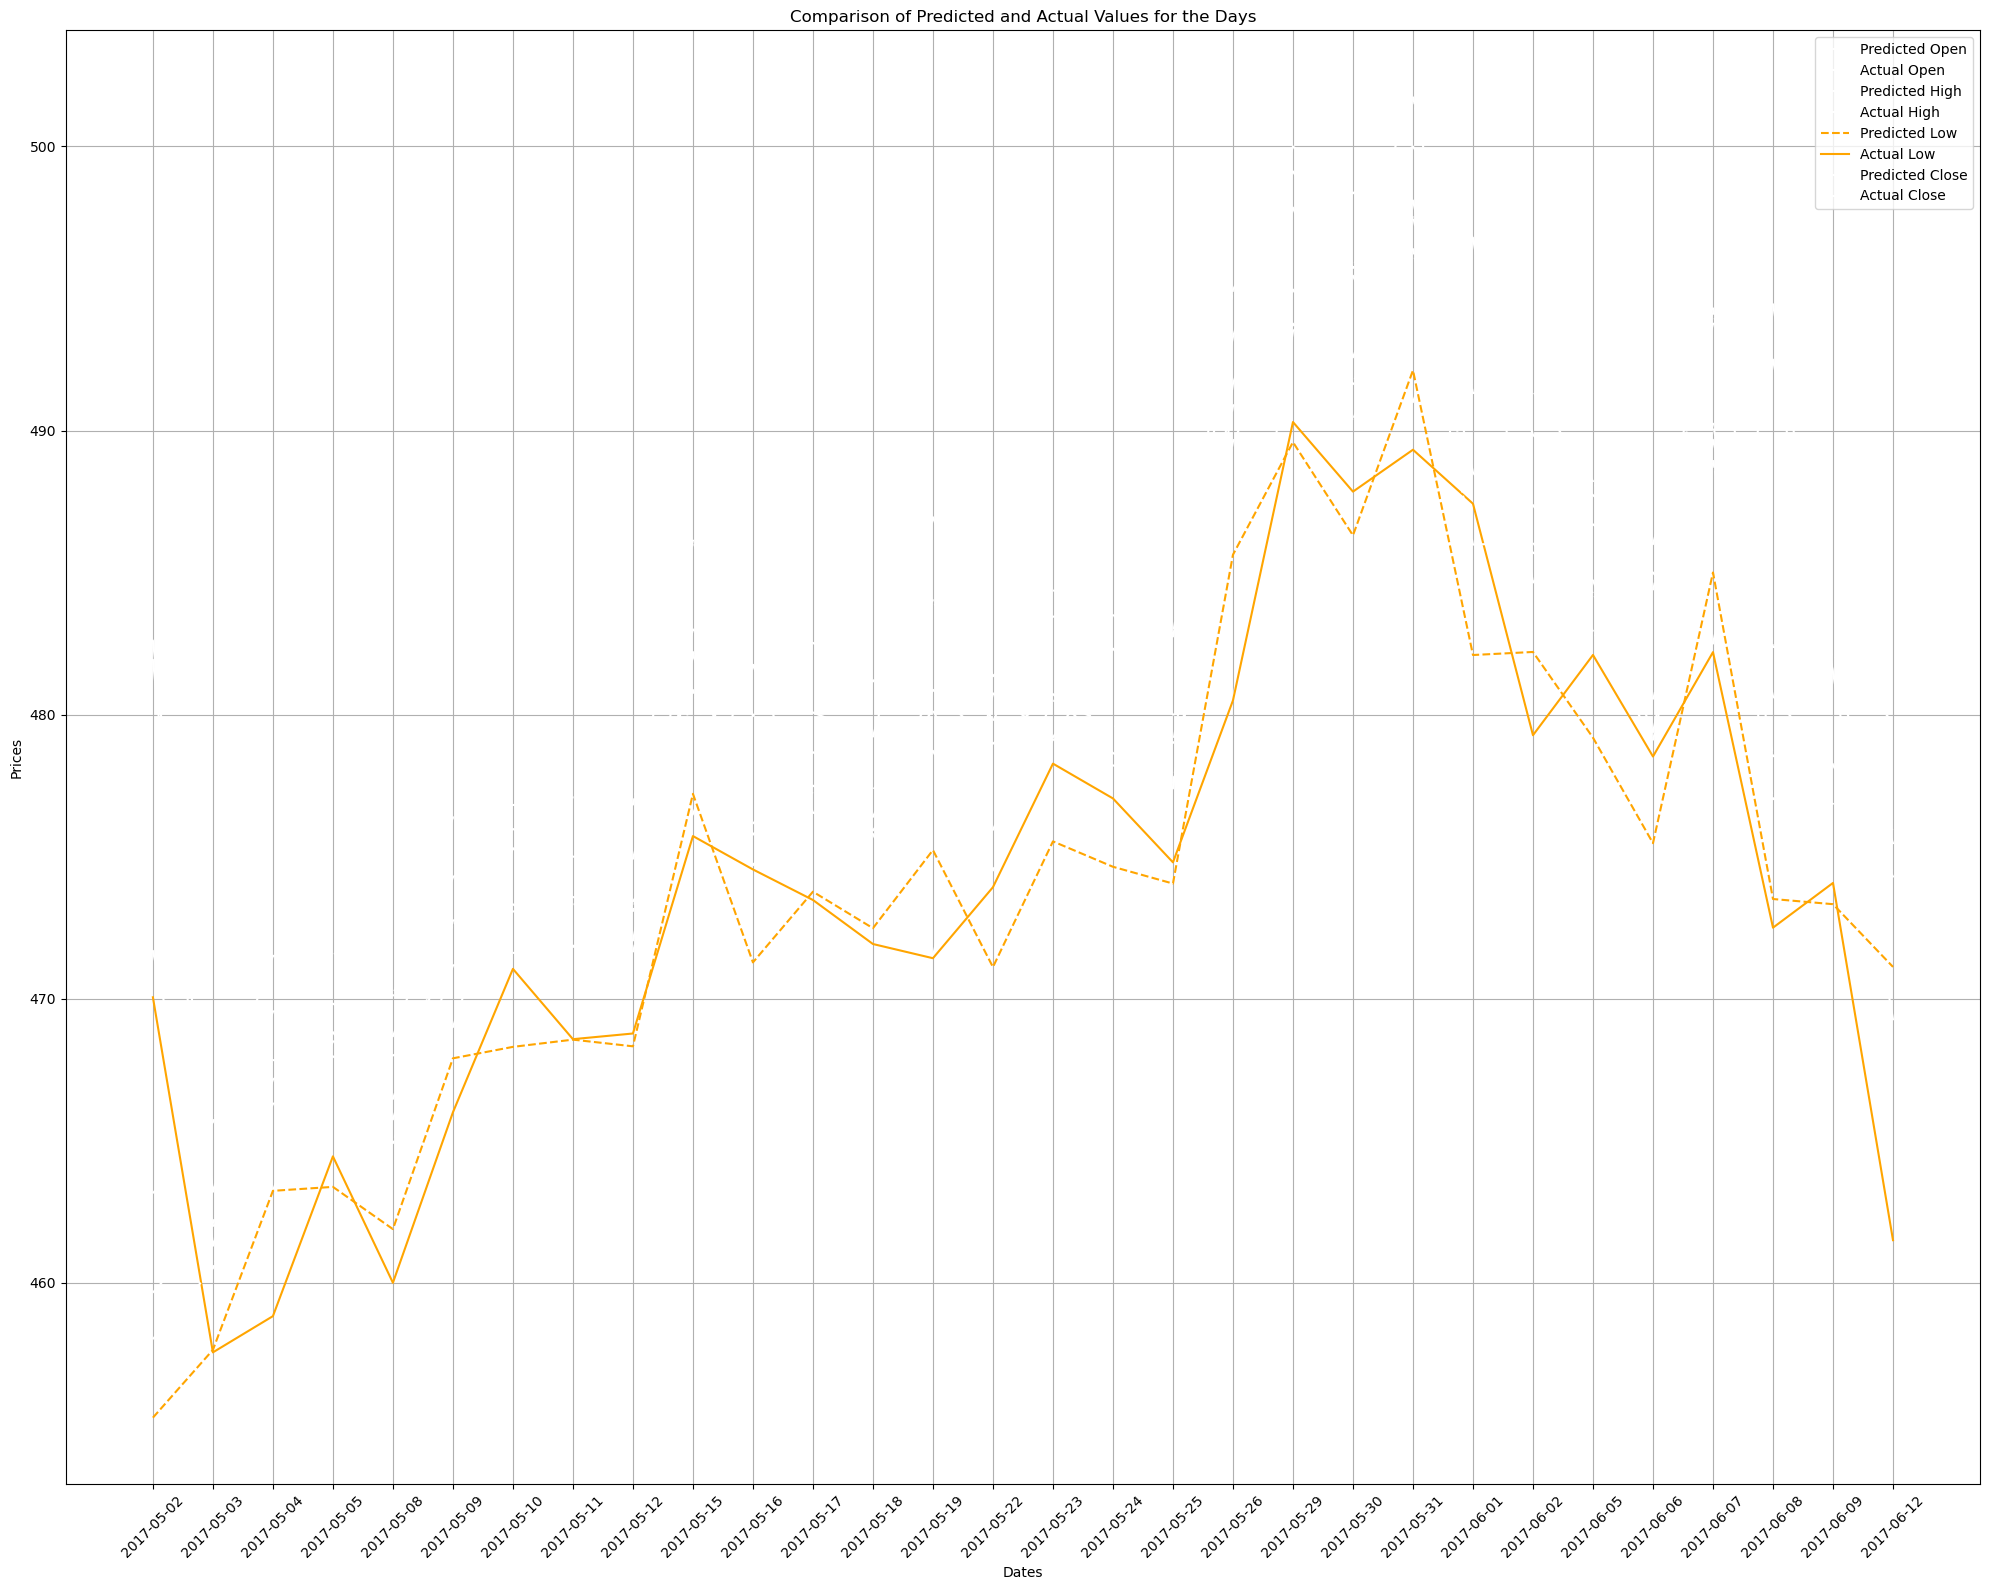

In [458]:
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations
from datetime import datetime, timedelta  # Import datetime and timedelta for date handling

# Assuming you have defined dates_set1_test, test_set1_predictions, and y_set1_test appropriately

# Dictionary to map index to category
dict_i = {
    0: 'Open',
    1: 'High',
    2: 'Low',
    3: 'Close'
}

# Define colors for each category (Open, High, Low, Close)
colors = ['white', 'white', 'orange', 'white']

# Create the figure
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed

# Prepare x-axis positions and labels for each date
x_positions = np.arange(len(dates_set1_test))  # Generate positions for each date
x_labels = [date.strftime('%Y-%m-%d') for date in dates_set1_test]  # Format dates as strings for plotting

# Plot predicted and actual values for all dates in dates_set1_test
for i in range(4):  # Iterate through Open, High, Low, Close
    plt.plot(
        x_positions,
        [test_set1_predictions[j][i] for j in range(len(dates_set1_test))],
        label=f'Predicted {dict_i[i]}',
        linestyle='--',
        color=colors[i]
    )
    plt.plot(
        x_positions,
        [y_set1_test[j-1][i] for j in range(len(dates_set1_test))],
        label=f'Actual {dict_i[i]}',
        linestyle='-',
        color=colors[i]
    )

# Set xticks with positions and labels
plt.xticks(x_positions, x_labels, rotation=45)

# Add title, labels, legend, grid, and ensure readability of dates
plt.title('Comparison of Predicted and Actual Values for the Days')  # Adjust title as needed
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [459]:
# starting date: 2017-05-03
# end date: 2017-06-12
dates_set2_train, X_set2_train, y_set2_train = dates_test[30:60], X_test[30:60], y_test[30:60]

print(dates_set2_train.shape)
print(X_set2_train.shape)
print(y_set2_train.shape)

(30,)
(30, 100, 4)
(30, 4)


In [460]:
dates_set2_train

array([Timestamp('2017-05-03 00:00:00'), Timestamp('2017-05-04 00:00:00'),
       Timestamp('2017-05-05 00:00:00'), Timestamp('2017-05-08 00:00:00'),
       Timestamp('2017-05-09 00:00:00'), Timestamp('2017-05-10 00:00:00'),
       Timestamp('2017-05-11 00:00:00'), Timestamp('2017-05-12 00:00:00'),
       Timestamp('2017-05-15 00:00:00'), Timestamp('2017-05-16 00:00:00'),
       Timestamp('2017-05-17 00:00:00'), Timestamp('2017-05-18 00:00:00'),
       Timestamp('2017-05-19 00:00:00'), Timestamp('2017-05-22 00:00:00'),
       Timestamp('2017-05-23 00:00:00'), Timestamp('2017-05-24 00:00:00'),
       Timestamp('2017-05-25 00:00:00'), Timestamp('2017-05-26 00:00:00'),
       Timestamp('2017-05-29 00:00:00'), Timestamp('2017-05-30 00:00:00'),
       Timestamp('2017-05-31 00:00:00'), Timestamp('2017-06-01 00:00:00'),
       Timestamp('2017-06-02 00:00:00'), Timestamp('2017-06-05 00:00:00'),
       Timestamp('2017-06-06 00:00:00'), Timestamp('2017-06-07 00:00:00'),
       Timestamp('2017-06

In [461]:
# Fine-tune the pre-trained model on the new data
model.fit(X_set2_train, y_set2_train, 
          epochs=50)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - loss: 19.4856 - mean_absolute_error: 3.1985
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - loss: 19.0307 - mean_absolute_error: 3.2192
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - loss: 19.3423 - mean_absolute_error: 3.3334
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - loss: 19.3052 - mean_absolute_error: 3.3288
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - loss: 18.9694 - mean_absolute_error: 3.2197
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - loss: 19.1898 - mean_absolute_error: 3.1727
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - loss: 19.0839 - mean_absolute_error: 3.1684
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - loss: 18.8333 - mean_absolute_error: 3.2205
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - loss: 18.9745 - mean_absolute_error: 3.2935
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - loss: 18.8368 - mean_absolute_error: 3.2708
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [462]:
# prediction on the next month
# starting date: 2017-06-14
# end date: 2017-07-25
dates_set2_test, X_set2_test, y_set2_test = dates_test[59:89], X_test[59:89], y_test[59:89]

print(dates_set2_test.shape)
print(X_set2_test.shape)
print(y_set2_test.shape)

(30,)
(30, 100, 4)
(30, 4)


In [463]:
dates_set2_test

array([Timestamp('2017-06-13 00:00:00'), Timestamp('2017-06-14 00:00:00'),
       Timestamp('2017-06-15 00:00:00'), Timestamp('2017-06-16 00:00:00'),
       Timestamp('2017-06-19 00:00:00'), Timestamp('2017-06-20 00:00:00'),
       Timestamp('2017-06-21 00:00:00'), Timestamp('2017-06-22 00:00:00'),
       Timestamp('2017-06-23 00:00:00'), Timestamp('2017-06-27 00:00:00'),
       Timestamp('2017-06-28 00:00:00'), Timestamp('2017-06-29 00:00:00'),
       Timestamp('2017-06-30 00:00:00'), Timestamp('2017-07-03 00:00:00'),
       Timestamp('2017-07-04 00:00:00'), Timestamp('2017-07-05 00:00:00'),
       Timestamp('2017-07-06 00:00:00'), Timestamp('2017-07-07 00:00:00'),
       Timestamp('2017-07-10 00:00:00'), Timestamp('2017-07-11 00:00:00'),
       Timestamp('2017-07-12 00:00:00'), Timestamp('2017-07-13 00:00:00'),
       Timestamp('2017-07-14 00:00:00'), Timestamp('2017-07-17 00:00:00'),
       Timestamp('2017-07-18 00:00:00'), Timestamp('2017-07-19 00:00:00'),
       Timestamp('2017-07

In [464]:
test_set2_predictions = model.predict(X_set2_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


##### **Test-2: Prediction From 60-90 days (2nd Month)**

In [465]:
from tabulate import tabulate

# Function to calculate delta and delta percentage
def calculate_delta(pred, actual):
    delta = pred - actual
    delta_percent = (delta / actual) * 100
    return delta, delta_percent

# Preparing the table data
table_data = []
for i in range(30):
    date = dates_set2_test[i]
    pred_open, pred_high, pred_low, pred_close = test_set2_predictions[i]
    act_open, act_high, act_low, act_close = y_set2_test[i-1]
    
    delta_open, delta_open_percent = calculate_delta(pred_open, act_open)
    delta_high, delta_high_percent = calculate_delta(pred_high, act_high)
    delta_low, delta_low_percent = calculate_delta(pred_low, act_low)
    delta_close, delta_close_percent = calculate_delta(pred_close, act_close)
    
    table_data.append([date, pred_open, act_open, delta_open, delta_open_percent,
                       pred_high, act_high, delta_high, delta_high_percent,
                       pred_low, act_low, delta_low, delta_low_percent,
                       pred_close, act_close, delta_close, delta_close_percent])

# Define table headers
headers = ["Date", "Predicted Open", "Actual Open", "Delta Open", "Delta Open%", 
           "Predicted High", "Actual High", "Delta High", "Delta High%", 
           "Predicted Low", "Actual Low", "Delta Low", "Delta Low%", 
           "Predicted Close", "Actual Close", "Delta Close", "Delta Close%"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid", floatfmt=".2f"))

+---------------------+------------------+---------------+--------------+---------------+------------------+---------------+--------------+---------------+-----------------+--------------+-------------+--------------+-------------------+----------------+---------------+----------------+
| Date                |   Predicted Open |   Actual Open |   Delta Open |   Delta Open% |   Predicted High |   Actual High |   Delta High |   Delta High% |   Predicted Low |   Actual Low |   Delta Low |   Delta Low% |   Predicted Close |   Actual Close |   Delta Close |   Delta Close% |
+=====================+==================+===============+==============+===============+==================+===============+==============+===============+=================+==============+=============+==============+===================+================+===============+================+
| 2017-06-13 00:00:00 |           478.26 |        495.00 |       -16.74 |         -3.38 |           482.40 |        499.50 |       -17.1

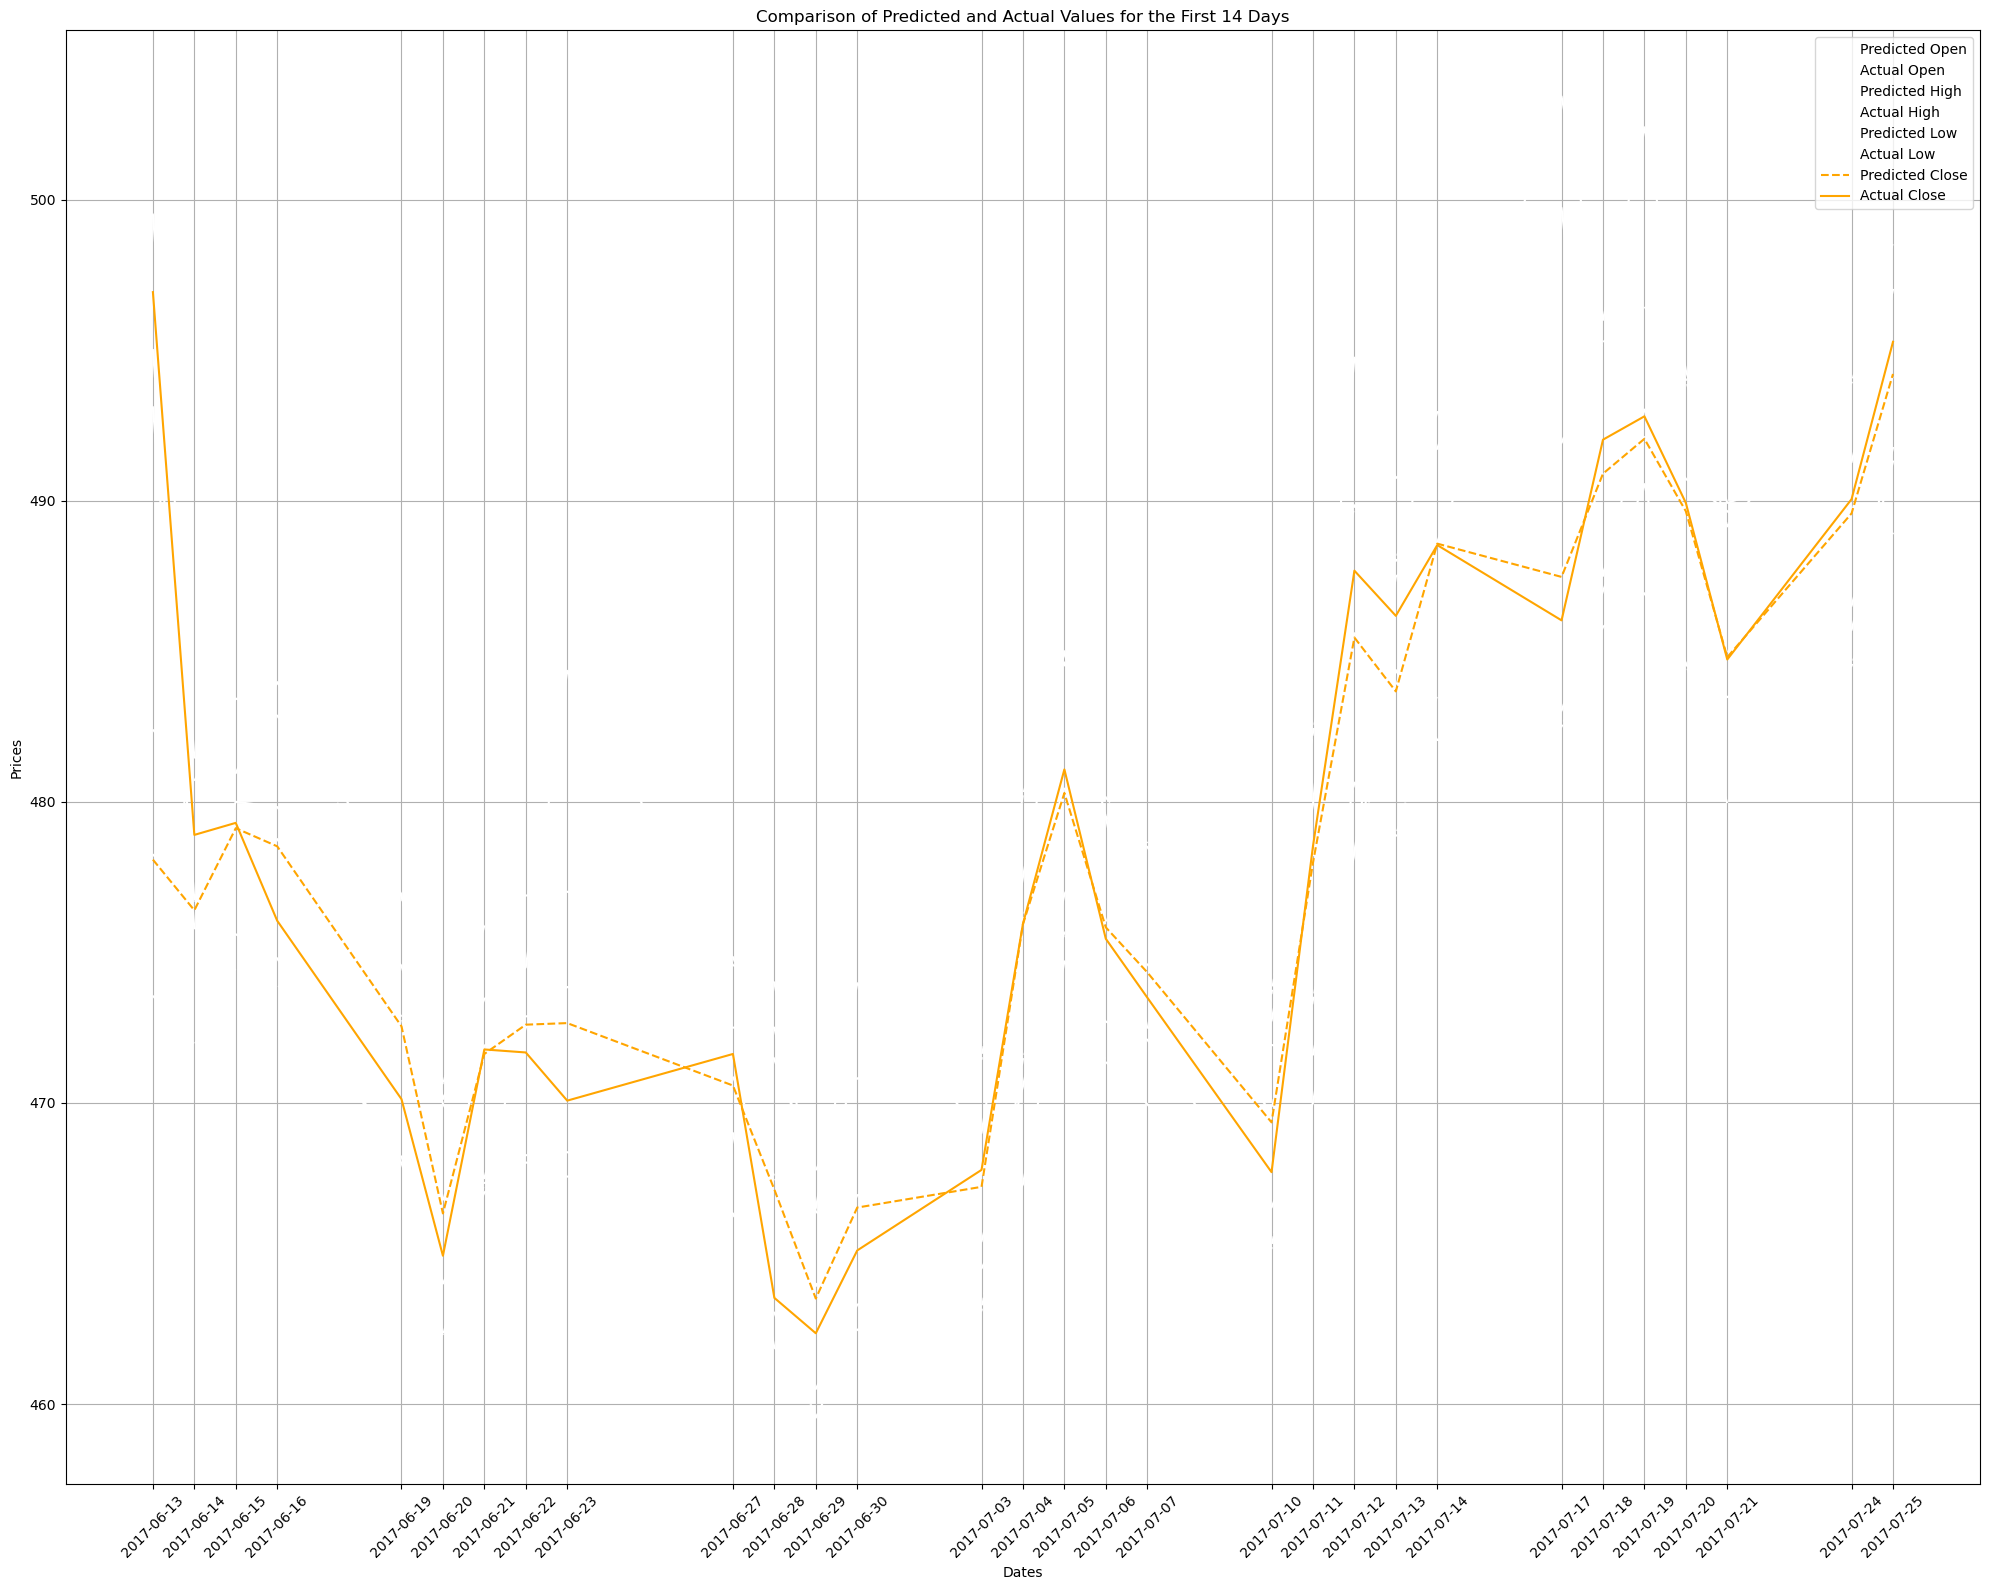

In [466]:
import matplotlib.pyplot as plt

# Dictionary to map index to category
dict_i = {
    0: 'Open',
    1: 'High',
    2: 'Low',
    3: 'Close'
}

# Define colors for each category (Open, High, Low, Close)
colors = ['white', 'white', 'white', 'orange', 'white', 'white', 'white', 'orange']

# Indices for the first 14 days (0 to 13)
selected_days = list(range(30))

# Create the figure
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed

# Plot predicted and actual values for the first 14 days
for i in range(4):  # Iterate through Open, High, Low, Close
    plt.plot(
        [dates_set2_test[j] for j in selected_days],
        [test_set2_predictions[j, i] for j in selected_days],
        label=f'Predicted {dict_i[i]}',
        linestyle='--',
        color=colors[i]
    )
    plt.plot(
        [dates_set2_test[j] for j in selected_days],
        [y_set2_test[j-1][i] for j in selected_days],
        label=f'Actual {dict_i[i]}',
        linestyle='-',
        color=colors[i + 4]
    )

plt.title('Comparison of Predicted and Actual Values for the First 14 Days')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks([dates_set2_test[j] for j in selected_days], rotation=45)  # Ensure all dates are displayed and rotated for readability
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [434]:
# starting date: 2017-06-14
# end date: 2017-07-25
dates_set3_train, X_set3_train, y_set3_train = dates_test[60:90], X_test[60:90], y_test[60:90]

print(dates_set3_train.shape)
print(X_set3_train.shape)
print(y_set3_train.shape)

(30,)
(30, 100, 4)
(30, 4)


In [435]:
dates_set3_train

array([Timestamp('2017-06-14 00:00:00'), Timestamp('2017-06-15 00:00:00'),
       Timestamp('2017-06-16 00:00:00'), Timestamp('2017-06-19 00:00:00'),
       Timestamp('2017-06-20 00:00:00'), Timestamp('2017-06-21 00:00:00'),
       Timestamp('2017-06-22 00:00:00'), Timestamp('2017-06-23 00:00:00'),
       Timestamp('2017-06-27 00:00:00'), Timestamp('2017-06-28 00:00:00'),
       Timestamp('2017-06-29 00:00:00'), Timestamp('2017-06-30 00:00:00'),
       Timestamp('2017-07-03 00:00:00'), Timestamp('2017-07-04 00:00:00'),
       Timestamp('2017-07-05 00:00:00'), Timestamp('2017-07-06 00:00:00'),
       Timestamp('2017-07-07 00:00:00'), Timestamp('2017-07-10 00:00:00'),
       Timestamp('2017-07-11 00:00:00'), Timestamp('2017-07-12 00:00:00'),
       Timestamp('2017-07-13 00:00:00'), Timestamp('2017-07-14 00:00:00'),
       Timestamp('2017-07-17 00:00:00'), Timestamp('2017-07-18 00:00:00'),
       Timestamp('2017-07-19 00:00:00'), Timestamp('2017-07-20 00:00:00'),
       Timestamp('2017-07

In [436]:
# Fine-tune the pre-trained model on the new data
model.fit(X_set3_train, y_set3_train, 
          epochs=50)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - loss: 18.1753 - mean_absolute_error: 3.4443
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - loss: 17.0399 - mean_absolute_error: 3.3130
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 17.7475 - mean_absolute_error: 3.4034
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - loss: 17.9754 - mean_absolute_error: 3.4227
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 17.0773 - mean_absolute_error: 3.3236
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - loss: 17.4252 - mean_absolute_error: 3.3577
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - loss: 17.7409 - mean_absolute_error: 3.3968
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - loss: 17.0740 - mean_absolute_error: 3.3190
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - loss: 17.1813 - mean_absolute_error: 3.3419
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - loss: 17.4996 - mean_absolute_error: 3.3806
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [437]:
# prediction on the next month
# starting date: 2017-06-14
# end date: 2017-07-25
dates_set3_test, X_set3_test, y_set3_test = dates_test[89:119], X_test[89:119], y_test[89:119]

print(dates_set3_test.shape)
print(X_set3_test.shape)
print(y_set3_test.shape)

(30,)
(30, 100, 4)
(30, 4)


In [438]:
dates_set3_test

array([Timestamp('2017-07-26 00:00:00'), Timestamp('2017-07-27 00:00:00'),
       Timestamp('2017-07-28 00:00:00'), Timestamp('2017-07-31 00:00:00'),
       Timestamp('2017-08-01 00:00:00'), Timestamp('2017-08-02 00:00:00'),
       Timestamp('2017-08-03 00:00:00'), Timestamp('2017-08-04 00:00:00'),
       Timestamp('2017-08-07 00:00:00'), Timestamp('2017-08-08 00:00:00'),
       Timestamp('2017-08-09 00:00:00'), Timestamp('2017-08-10 00:00:00'),
       Timestamp('2017-08-11 00:00:00'), Timestamp('2017-08-14 00:00:00'),
       Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-17 00:00:00'),
       Timestamp('2017-08-18 00:00:00'), Timestamp('2017-08-21 00:00:00'),
       Timestamp('2017-08-22 00:00:00'), Timestamp('2017-08-23 00:00:00'),
       Timestamp('2017-08-24 00:00:00'), Timestamp('2017-08-28 00:00:00'),
       Timestamp('2017-08-29 00:00:00'), Timestamp('2017-08-30 00:00:00'),
       Timestamp('2017-08-31 00:00:00'), Timestamp('2017-09-01 00:00:00'),
       Timestamp('2017-09

In [439]:
test_set3_predictions = model.predict(X_set3_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


##### **Test-3: Prediction From 90-120 days (3rd Month)**

In [440]:
from tabulate import tabulate

# Function to calculate delta and delta percentage
def calculate_delta(pred, actual):
    delta = pred - actual
    delta_percent = (delta / actual) * 100
    return delta, delta_percent

# Preparing the table data
table_data = []
for i in range(30):
    date = dates_set3_test[i]
    pred_open, pred_high, pred_low, pred_close = test_set3_predictions[i]
    act_open, act_high, act_low, act_close = y_set3_test[i-1]
    
    delta_open, delta_open_percent = calculate_delta(pred_open, act_open)
    delta_high, delta_high_percent = calculate_delta(pred_high, act_high)
    delta_low, delta_low_percent = calculate_delta(pred_low, act_low)
    delta_close, delta_close_percent = calculate_delta(pred_close, act_close)
    
    table_data.append([date, pred_open, act_open, delta_open, delta_open_percent,
                       pred_high, act_high, delta_high, delta_high_percent,
                       pred_low, act_low, delta_low, delta_low_percent,
                       pred_close, act_close, delta_close, delta_close_percent])

# Define table headers
headers = ["Date", "Predicted Open", "Actual Open", "Delta Open", "Delta Open%", 
           "Predicted High", "Actual High", "Delta High", "Delta High%", 
           "Predicted Low", "Actual Low", "Delta Low", "Delta Low%", 
           "Predicted Close", "Actual Close", "Delta Close", "Delta Close%"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid", floatfmt=".2f"))

+---------------------+------------------+---------------+--------------+---------------+------------------+---------------+--------------+---------------+-----------------+--------------+-------------+--------------+-------------------+----------------+---------------+----------------+
| Date                |   Predicted Open |   Actual Open |   Delta Open |   Delta Open% |   Predicted High |   Actual High |   Delta High |   Delta High% |   Predicted Low |   Actual Low |   Delta Low |   Delta Low% |   Predicted Close |   Actual Close |   Delta Close |   Delta Close% |
+=====================+==================+===============+==============+===============+==================+===============+==============+===============+=================+==============+=============+==============+===================+================+===============+================+
| 2017-07-26 00:00:00 |           496.90 |        450.00 |        46.90 |         10.42 |           501.56 |        450.25 |        51.3

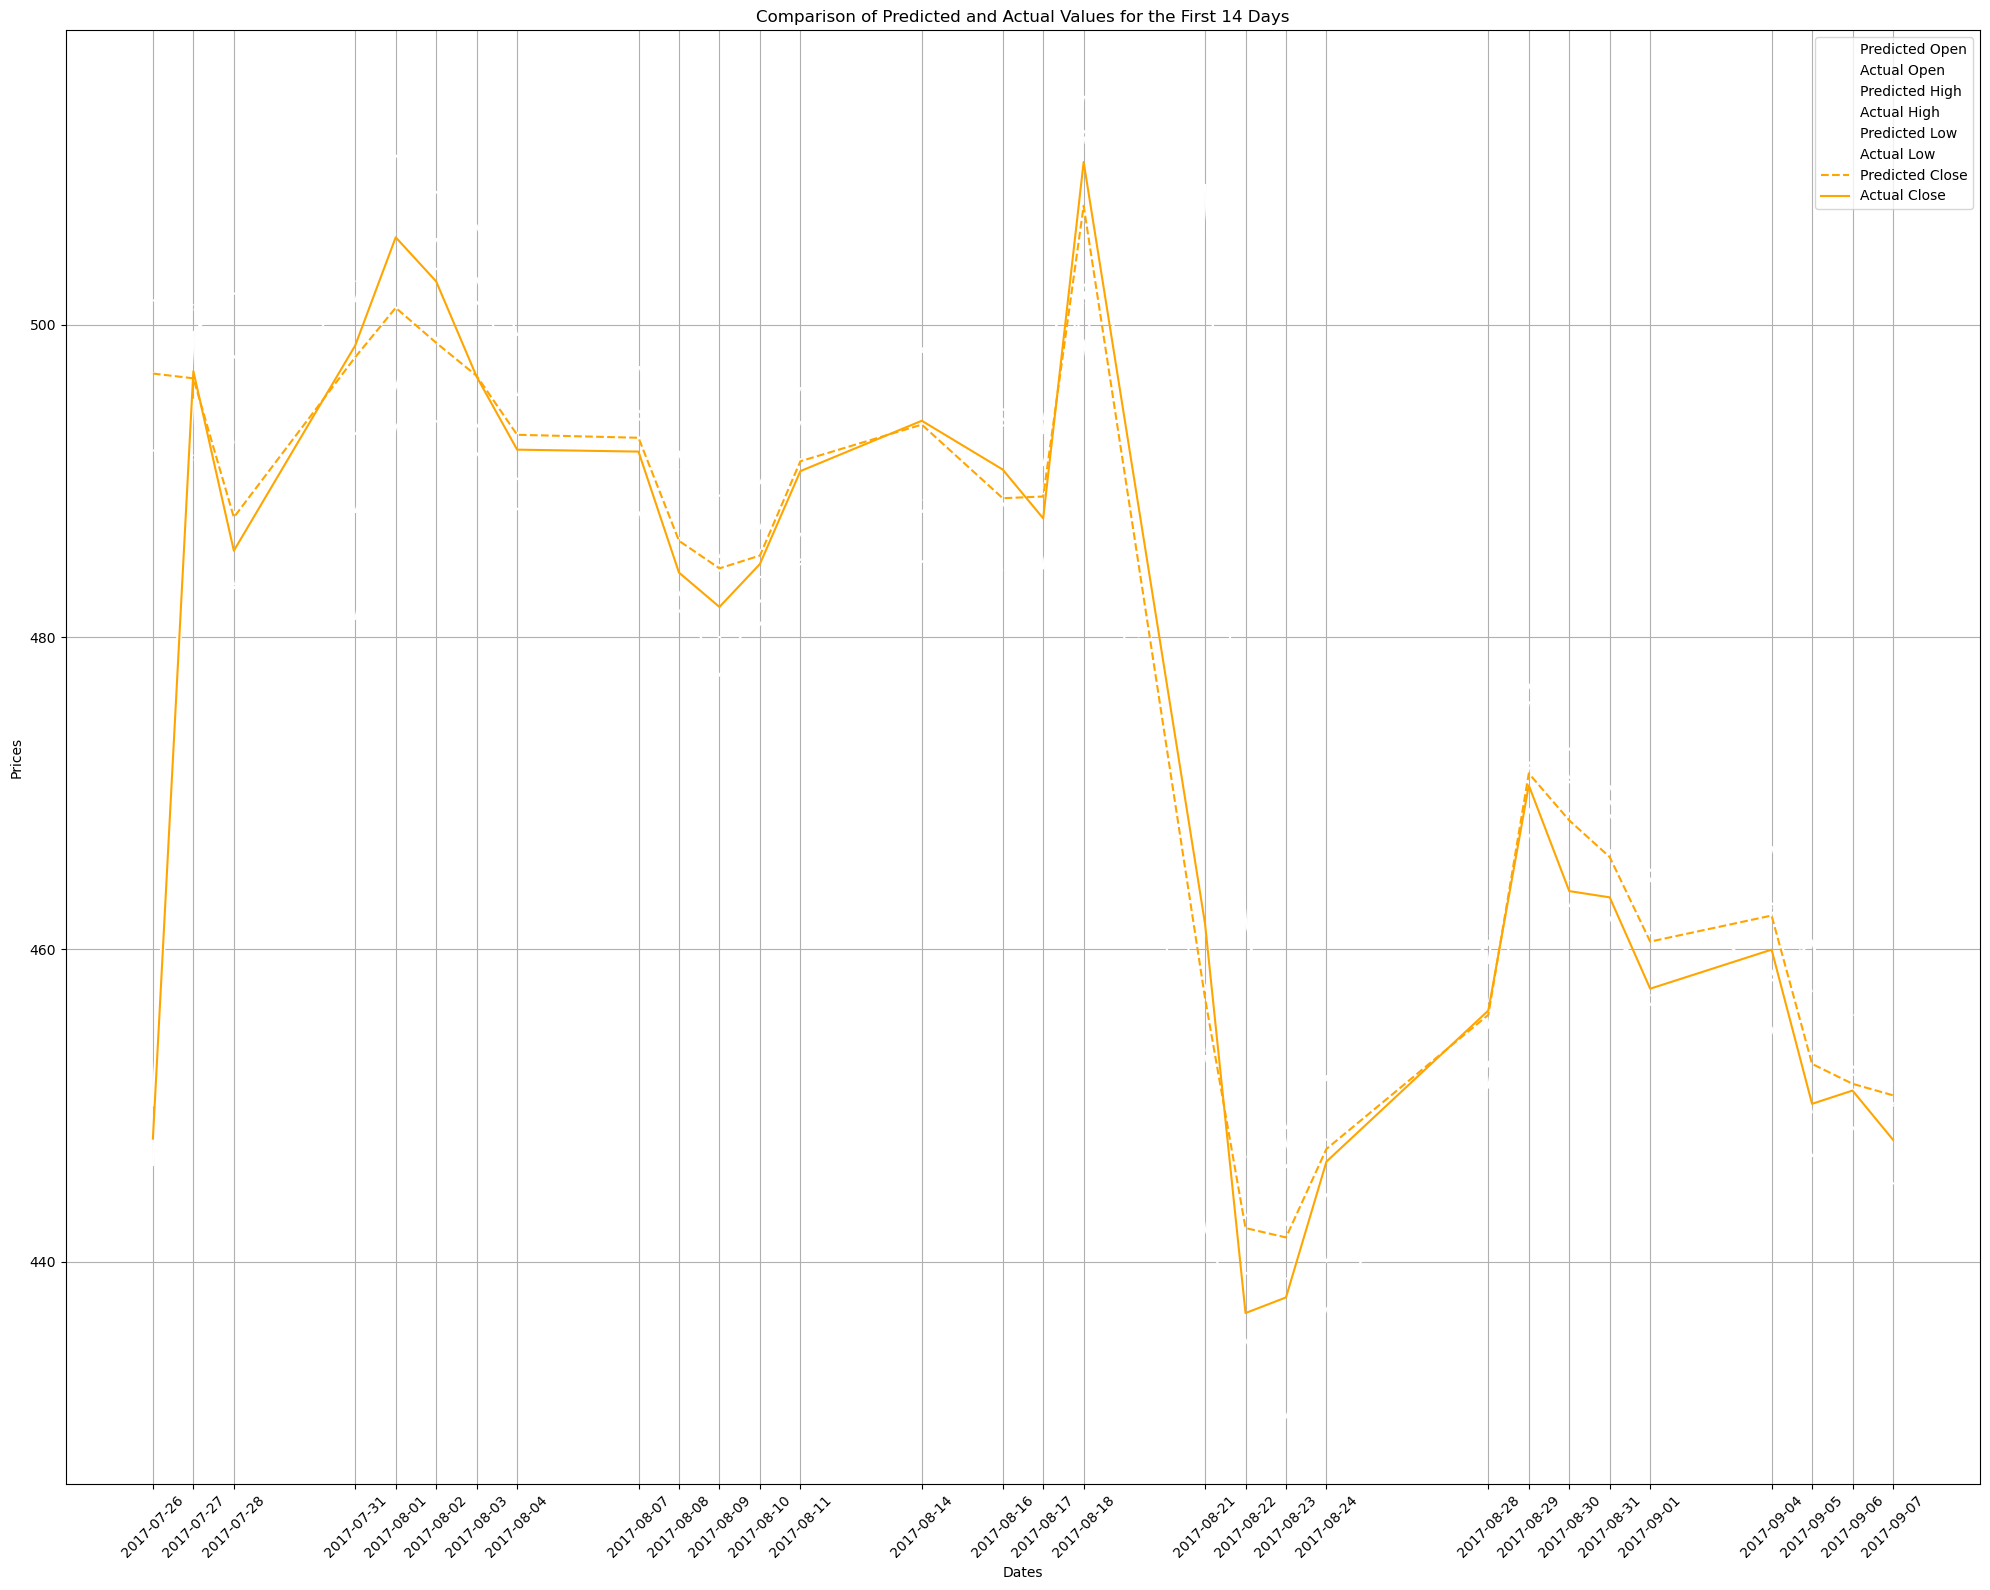

In [444]:
import matplotlib.pyplot as plt

# Dictionary to map index to category
dict_i = {
    0: 'Open',
    1: 'High',
    2: 'Low',
    3: 'Close'
}

# Define colors for each category (Open, High, Low, Close)
colors = ['white', 'white', 'white', 'orange', 'white', 'white', 'white', 'orange']

# Indices for the first 14 days (0 to 13)
selected_days = list(range(30))

# Create the figure
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed

# Plot predicted and actual values for the first 14 days
for i in range(4):  # Iterate through Open, High, Low, Close
    plt.plot(
        [dates_set3_test[j] for j in selected_days],
        [test_set3_predictions[j, i] for j in selected_days],
        label=f'Predicted {dict_i[i]}',
        linestyle='--',
        color=colors[i]
    )
    plt.plot(
        [dates_set3_test[j] for j in selected_days],
        [y_set3_test[j-1][i] for j in selected_days],
        label=f'Actual {dict_i[i]}',
        linestyle='-',
        color=colors[i + 4]
    )

plt.title('Comparison of Predicted and Actual Values for the First 14 Days')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks([dates_set3_test[j] for j in selected_days], rotation=45)  # Ensure all dates are displayed and rotated for readability
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

#### **Pending Work**

In [289]:
# starting date: 2017-07-27
# end date: 2017-09-07
dates_set4_train, X_set4_train, y_set4_train = dates_test[90:120], X_test[90:120], y_test[90:120]

print(dates_set4_train.shape)
print(X_set4_train.shape)
print(y_set4_train.shape)

(30,)
(30, 100, 4)
(30, 4)


In [290]:
dates_set4_train

array([Timestamp('2017-07-27 00:00:00'), Timestamp('2017-07-28 00:00:00'),
       Timestamp('2017-07-31 00:00:00'), Timestamp('2017-08-01 00:00:00'),
       Timestamp('2017-08-02 00:00:00'), Timestamp('2017-08-03 00:00:00'),
       Timestamp('2017-08-04 00:00:00'), Timestamp('2017-08-07 00:00:00'),
       Timestamp('2017-08-08 00:00:00'), Timestamp('2017-08-09 00:00:00'),
       Timestamp('2017-08-10 00:00:00'), Timestamp('2017-08-11 00:00:00'),
       Timestamp('2017-08-14 00:00:00'), Timestamp('2017-08-16 00:00:00'),
       Timestamp('2017-08-17 00:00:00'), Timestamp('2017-08-18 00:00:00'),
       Timestamp('2017-08-21 00:00:00'), Timestamp('2017-08-22 00:00:00'),
       Timestamp('2017-08-23 00:00:00'), Timestamp('2017-08-24 00:00:00'),
       Timestamp('2017-08-28 00:00:00'), Timestamp('2017-08-29 00:00:00'),
       Timestamp('2017-08-30 00:00:00'), Timestamp('2017-08-31 00:00:00'),
       Timestamp('2017-09-01 00:00:00'), Timestamp('2017-09-04 00:00:00'),
       Timestamp('2017-09

In [291]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the input shape based on the original model
input_shape = (3, 4)

# Define the new input layer
inputs = Input(shape=input_shape)

# Load the layers from the original model, excluding the output layer
x = layers.LSTM(256)(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)

# Add the new layers
x = Dense(32, activation='relu')(x)
new_output = Dense(4)(x)

# Create the new model
new_model = Model(inputs=inputs, outputs=new_output)

# Copy weights from the original model to the new model
for i in range(len(new_model.layers) - 2):
    new_model.layers[i].set_weights(model.layers[i].get_weights())
    new_model.layers[i].trainable = False  # Freeze original layers

# Compile the new model
new_model.compile(loss='mse', 
                  optimizer=Adam(learning_rate=0.0001),
                  metrics=['mean_absolute_error'])

# Train the new model with early stopping
new_model.fit(X_set4_train, y_set4_train, 
              epochs=30)

NameError: name 'layers' is not defined

In [292]:
# Fine-tune the pre-trained model on the new data
model.fit(X_set4_train, y_set4_train, 
          epochs=50)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step - loss: 92.0713 - mean_absolute_error: 5.5990
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - loss: 90.7861 - mean_absolute_error: 5.3865
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - loss: 91.2914 - mean_absolute_error: 5.3934
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - loss: 91.3523 - mean_absolute_error: 5.4210
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - loss: 90.0760 - mean_absolute_error: 5.3550
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - loss: 89.9059 - mean_absolute_error: 5.4572
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - loss: 89.9941 - mean_absolute_error: 5.5358
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - loss: 88.9705 - mean_absolute_error: 5.4376
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - loss: 88.4451 - mean_absolute_error: 5.3508
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - loss: 88.5097 - mean_absolute_error: 5.3772
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [293]:
# prediction on the next month
# starting date: 2017-06-14
# end date: 2017-07-25
dates_set4_test, X_set4_test, y_set4_test = dates_test[120:150], X_test[120:150], y_test[120:150]

print(dates_set4_test.shape)
print(X_set4_test.shape)
print(y_set4_test.shape)

(30,)
(30, 100, 4)
(30, 4)


In [294]:
test_set4_predictions = model.predict(X_set4_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


##### **Test-4: Prediction From 120-150 days (4th Month)**

In [295]:
from tabulate import tabulate

# Function to calculate delta and delta percentage
def calculate_delta(pred, actual):
    delta = pred - actual
    delta_percent = (delta / actual) * 100
    return delta, delta_percent

# Preparing the table data
table_data = []
for i in range(30):
    date = dates_set4_test[i]
    pred_open, pred_high, pred_low, pred_close = test_set4_predictions[i]
    act_open, act_high, act_low, act_close = y_set3_test[i]
    
    delta_open, delta_open_percent = calculate_delta(pred_open, act_open)
    delta_high, delta_high_percent = calculate_delta(pred_high, act_high)
    delta_low, delta_low_percent = calculate_delta(pred_low, act_low)
    delta_close, delta_close_percent = calculate_delta(pred_close, act_close)
    
    table_data.append([date, pred_open, act_open, delta_open, delta_open_percent,
                       pred_high, act_high, delta_high, delta_high_percent,
                       pred_low, act_low, delta_low, delta_low_percent,
                       pred_close, act_close, delta_close, delta_close_percent])

# Define table headers
headers = ["Date", "Predicted Open", "Actual Open", "Delta Open", "Delta Open%", 
           "Predicted High", "Actual High", "Delta High", "Delta High%", 
           "Predicted Low", "Actual Low", "Delta Low", "Delta Low%", 
           "Predicted Close", "Actual Close", "Delta Close", "Delta Close%"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid", floatfmt=".2f"))

+---------------------+------------------+---------------+--------------+---------------+------------------+---------------+--------------+---------------+-----------------+--------------+-------------+--------------+-------------------+----------------+---------------+----------------+
| Date                |   Predicted Open |   Actual Open |   Delta Open |   Delta Open% |   Predicted High |   Actual High |   Delta High |   Delta High% |   Predicted Low |   Actual Low |   Delta Low |   Delta Low% |   Predicted Close |   Actual Close |   Delta Close |   Delta Close% |
+=====================+==================+===============+==============+===============+==================+===============+==============+===============+=================+==============+=============+==============+===================+================+===============+================+
| 2017-09-11 00:00:00 |           447.33 |        498.00 |       -50.67 |        -10.18 |           451.08 |        502.00 |       -50.9

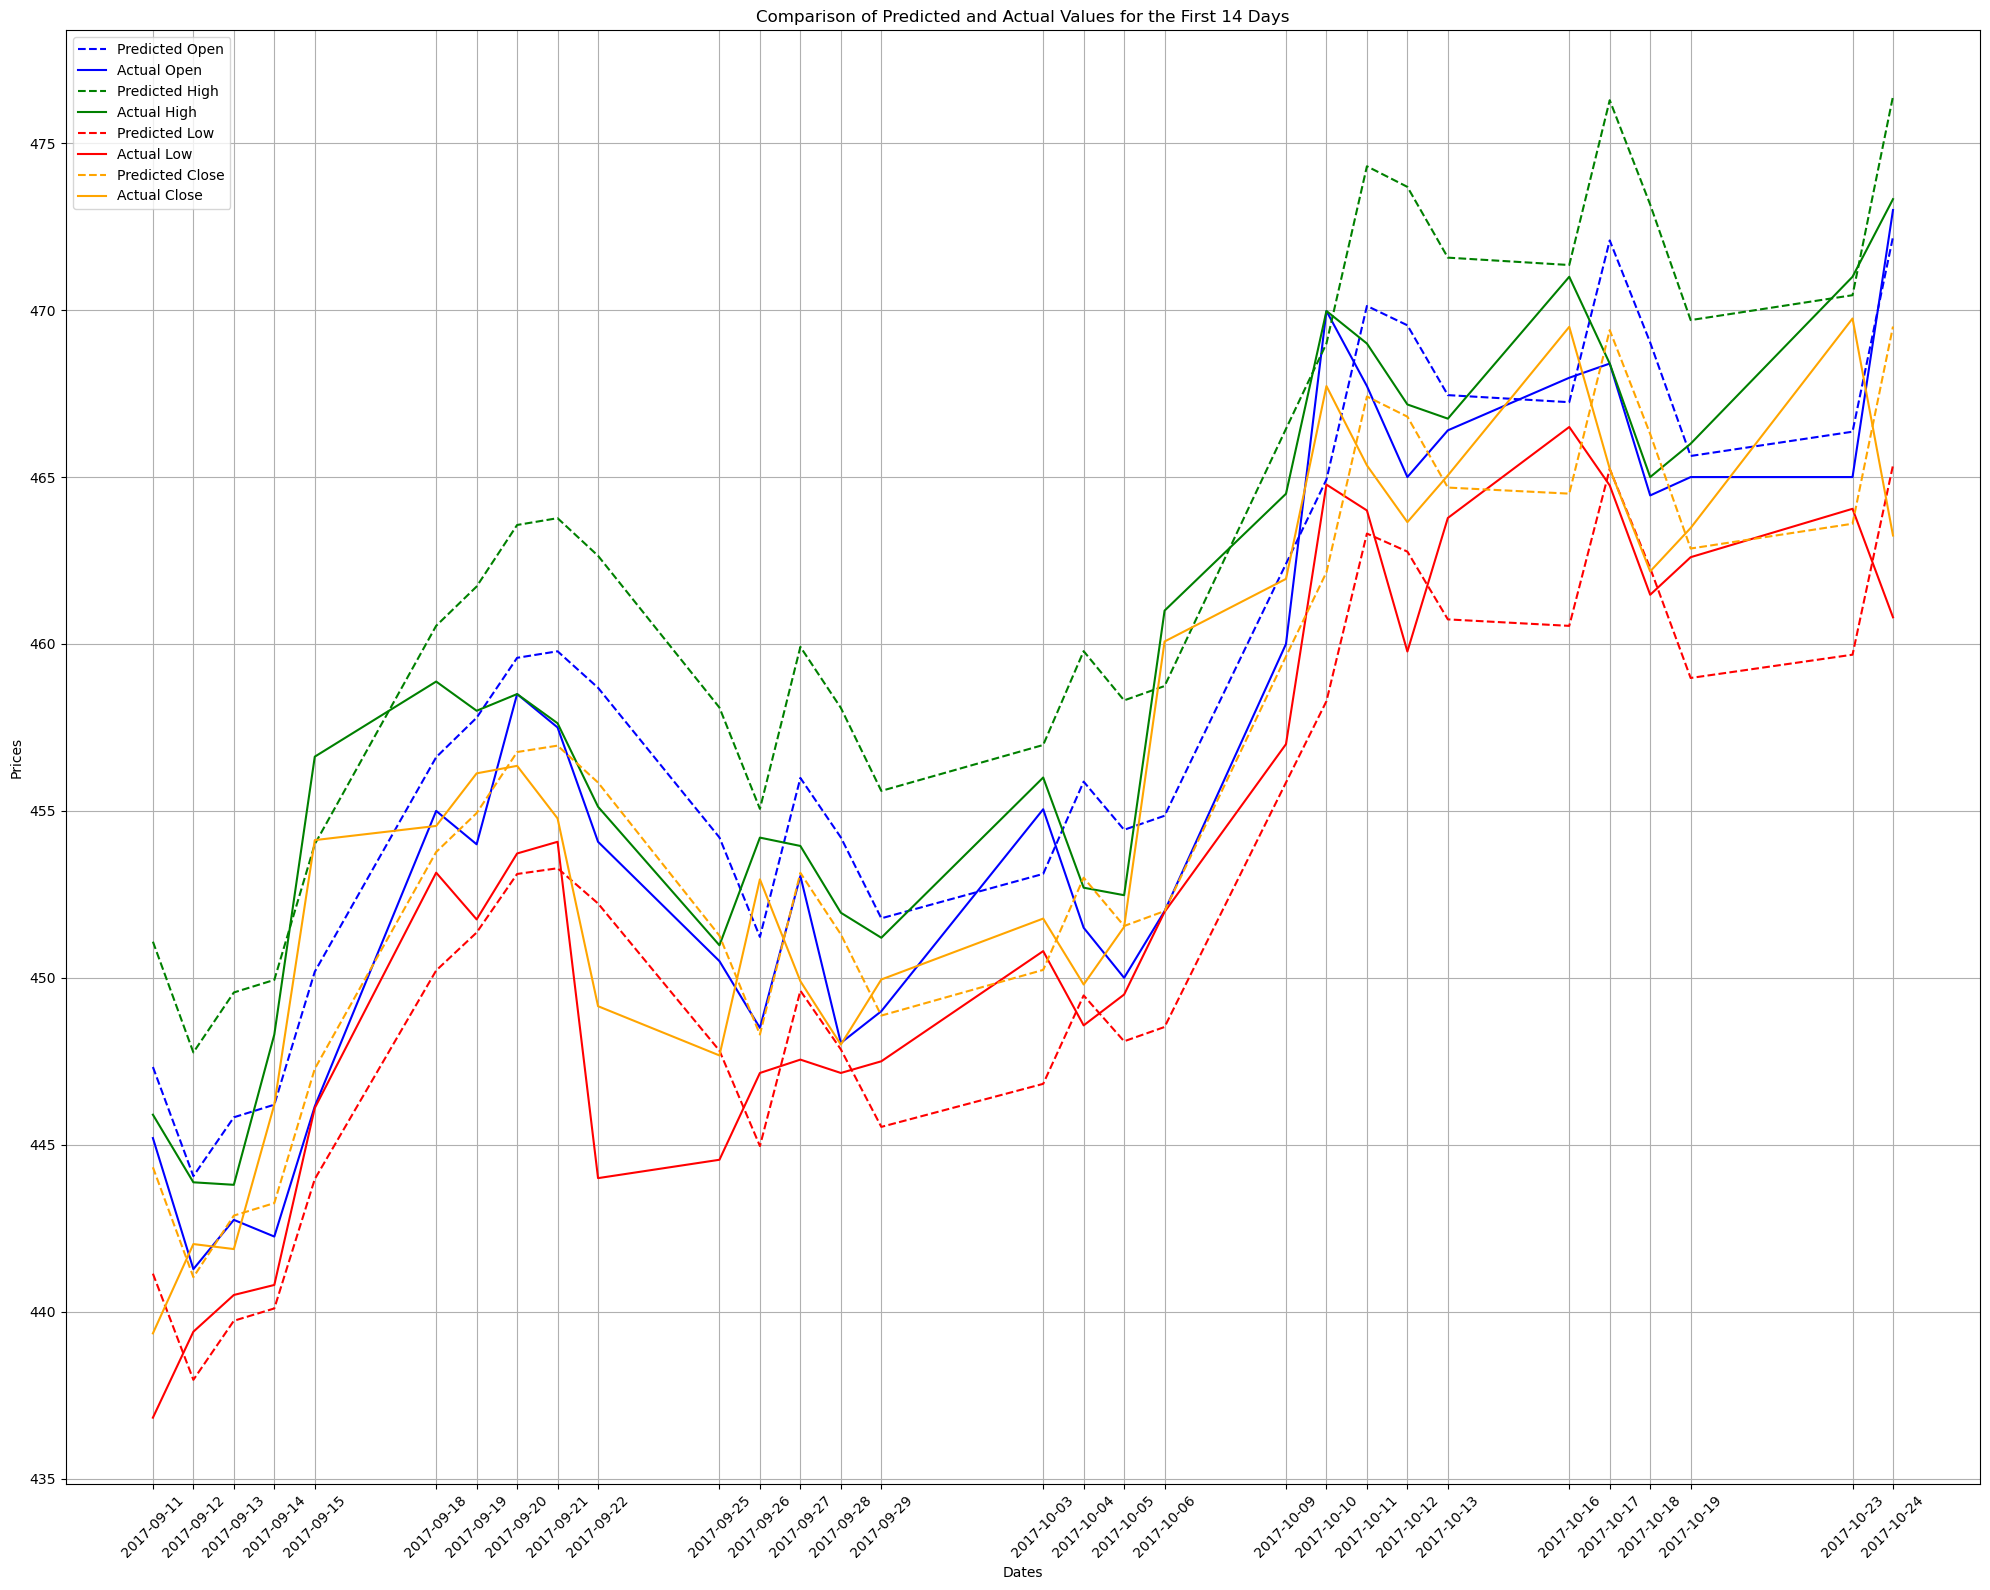

In [296]:
import matplotlib.pyplot as plt

# Dictionary to map index to category
dict_i = {
    0: 'Open',
    1: 'High',
    2: 'Low',
    3: 'Close'
}

# Define colors for each category (Open, High, Low, Close)
colors = ['blue', 'green', 'red', 'orange', 'blue', 'green', 'red', 'orange']

# Indices for the first 14 days (0 to 13)
selected_days = list(range(30))

# Create the figure
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed

# Plot predicted and actual values for the first 14 days
for i in range(4):  # Iterate through Open, High, Low, Close
    plt.plot(
        [dates_set4_test[j] for j in selected_days],
        [test_set4_predictions[j, i] for j in selected_days],
        label=f'Predicted {dict_i[i]}',
        linestyle='--',
        color=colors[i]
    )
    plt.plot(
        [dates_set4_test[j] for j in selected_days],
        [y_set4_test[j, i] for j in selected_days],
        label=f'Actual {dict_i[i]}',
        linestyle='-',
        color=colors[i + 4]
    )

plt.title('Comparison of Predicted and Actual Values for the First 14 Days')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks([dates_set4_test[j] for j in selected_days], rotation=45)  # Ensure all dates are displayed and rotated for readability
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [297]:
# starting date: 2017-07-27
# end date: 2017-09-07
dates_set5_train, X_set5_train, y_set5_train = dates_test[120:150], X_test[120:150], y_test[120:150]

print(dates_set5_train.shape)
print(X_set5_train.shape)
print(y_set5_train.shape)

(30,)
(30, 100, 4)
(30, 4)


In [298]:
dates_set5_train

array([Timestamp('2017-09-11 00:00:00'), Timestamp('2017-09-12 00:00:00'),
       Timestamp('2017-09-13 00:00:00'), Timestamp('2017-09-14 00:00:00'),
       Timestamp('2017-09-15 00:00:00'), Timestamp('2017-09-18 00:00:00'),
       Timestamp('2017-09-19 00:00:00'), Timestamp('2017-09-20 00:00:00'),
       Timestamp('2017-09-21 00:00:00'), Timestamp('2017-09-22 00:00:00'),
       Timestamp('2017-09-25 00:00:00'), Timestamp('2017-09-26 00:00:00'),
       Timestamp('2017-09-27 00:00:00'), Timestamp('2017-09-28 00:00:00'),
       Timestamp('2017-09-29 00:00:00'), Timestamp('2017-10-03 00:00:00'),
       Timestamp('2017-10-04 00:00:00'), Timestamp('2017-10-05 00:00:00'),
       Timestamp('2017-10-06 00:00:00'), Timestamp('2017-10-09 00:00:00'),
       Timestamp('2017-10-10 00:00:00'), Timestamp('2017-10-11 00:00:00'),
       Timestamp('2017-10-12 00:00:00'), Timestamp('2017-10-13 00:00:00'),
       Timestamp('2017-10-16 00:00:00'), Timestamp('2017-10-17 00:00:00'),
       Timestamp('2017-10

In [299]:
# Fine-tune the pre-trained model on the new data
model.fit(X_set5_train, y_set5_train, 
          epochs=50)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14.9497 - mean_absolute_error: 3.2379
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step - loss: 13.0871 - mean_absolute_error: 3.0088
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - loss: 13.8554 - mean_absolute_error: 2.9907
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - loss: 14.6442 - mean_absolute_error: 3.0312
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step - loss: 13.2627 - mean_absolute_error: 2.9659
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step - loss: 13.2071 - mean_absolute_error: 3.0344
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - loss: 14.0585 - mean_absolute_error: 3.1452
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - loss: 13.2551 - mean_absolute_error: 3.0451
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 12.7349 - mean_absolute_error: 2.9454
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - loss: 13.3688 - mean_absolute_error: 2.9410
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23

In [300]:
# prediction on the next month
# starting date: 2017-06-14
# end date: 2017-07-25
dates_set5_test, X_set5_test, y_set5_test = dates_test[150:180], X_test[150:180], y_test[150:180]

print(dates_set5_test.shape)
print(X_set5_test.shape)
print(y_set5_test.shape)

(30,)
(30, 100, 4)
(30, 4)


In [301]:
test_set5_predictions = model.predict(X_set5_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


##### **Test-5: Prediction From 150-180 days (5th Month)**

In [302]:
from tabulate import tabulate

# Function to calculate delta and delta percentage
def calculate_delta(pred, actual):
    delta = pred - actual
    delta_percent = (delta / actual) * 100
    return delta, delta_percent

# Preparing the table data
table_data = []
for i in range(30):
    date = dates_set5_test[i]
    pred_open, pred_high, pred_low, pred_close = test_set5_predictions[i]
    act_open, act_high, act_low, act_close = y_set3_test[i]
    
    delta_open, delta_open_percent = calculate_delta(pred_open, act_open)
    delta_high, delta_high_percent = calculate_delta(pred_high, act_high)
    delta_low, delta_low_percent = calculate_delta(pred_low, act_low)
    delta_close, delta_close_percent = calculate_delta(pred_close, act_close)
    
    table_data.append([date, pred_open, act_open, delta_open, delta_open_percent,
                       pred_high, act_high, delta_high, delta_high_percent,
                       pred_low, act_low, delta_low, delta_low_percent,
                       pred_close, act_close, delta_close, delta_close_percent])

# Define table headers
headers = ["Date", "Predicted Open", "Actual Open", "Delta Open", "Delta Open%", 
           "Predicted High", "Actual High", "Delta High", "Delta High%", 
           "Predicted Low", "Actual Low", "Delta Low", "Delta Low%", 
           "Predicted Close", "Actual Close", "Delta Close", "Delta Close%"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid", floatfmt=".2f"))

+---------------------+------------------+---------------+--------------+---------------+------------------+---------------+--------------+---------------+-----------------+--------------+-------------+--------------+-------------------+----------------+---------------+----------------+
| Date                |   Predicted Open |   Actual Open |   Delta Open |   Delta Open% |   Predicted High |   Actual High |   Delta High |   Delta High% |   Predicted Low |   Actual Low |   Delta Low |   Delta Low% |   Predicted Close |   Actual Close |   Delta Close |   Delta Close% |
+=====================+==================+===============+==============+===============+==================+===============+==============+===============+=================+==============+=============+==============+===================+================+===============+================+
| 2017-10-25 00:00:00 |           463.24 |        498.00 |       -34.76 |         -6.98 |           466.12 |        502.00 |       -35.8

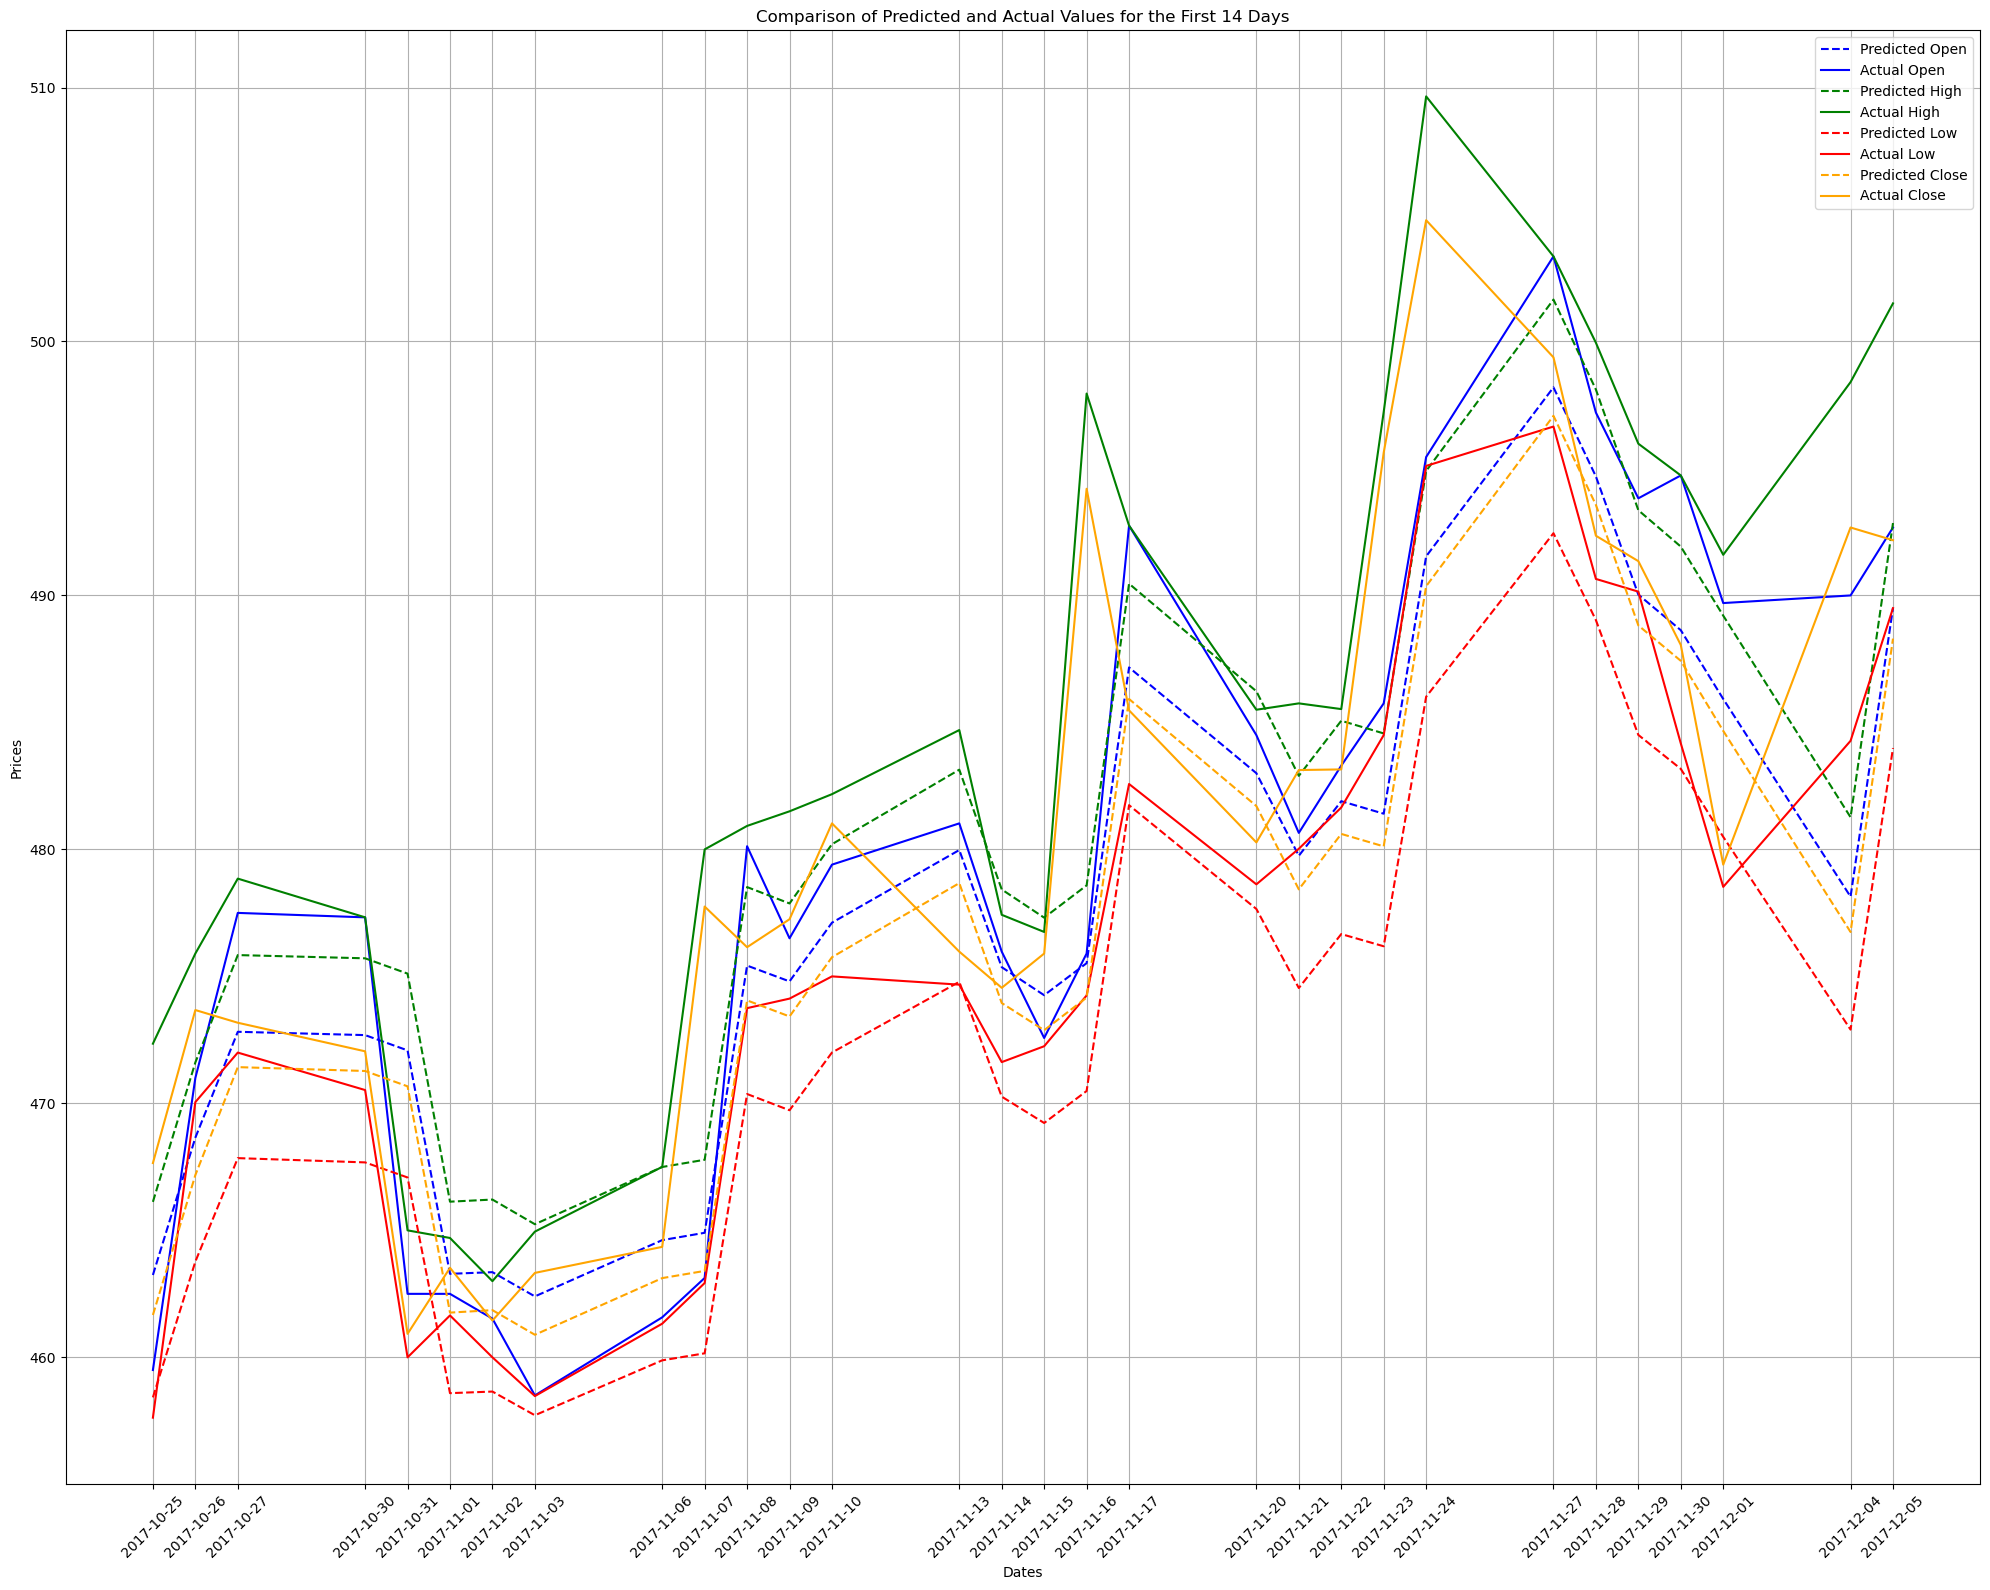

In [303]:
import matplotlib.pyplot as plt

# Dictionary to map index to category
dict_i = {
    0: 'Open',
    1: 'High',
    2: 'Low',
    3: 'Close'
}

# Define colors for each category (Open, High, Low, Close)
colors = ['blue', 'green', 'red', 'orange', 'blue', 'green', 'red', 'orange']

# Indices for the first 14 days (0 to 13)
selected_days = list(range(30))

# Create the figure
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed

# Plot predicted and actual values for the first 14 days
for i in range(4):  # Iterate through Open, High, Low, Close
    plt.plot(
        [dates_set5_test[j] for j in selected_days],
        [test_set5_predictions[j, i] for j in selected_days],
        label=f'Predicted {dict_i[i]}',
        linestyle='--',
        color=colors[i]
    )
    plt.plot(
        [dates_set5_test[j] for j in selected_days],
        [y_set5_test[j, i] for j in selected_days],
        label=f'Actual {dict_i[i]}',
        linestyle='-',
        color=colors[i + 4]
    )

plt.title('Comparison of Predicted and Actual Values for the First 14 Days')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks([dates_set5_test[j] for j in selected_days], rotation=45)  # Ensure all dates are displayed and rotated for readability
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [304]:
# starting date: 2017-10-25
# end date: 2017-12-04
dates_set6_train, X_set6_train, y_set6_train = dates_test[150:180], X_test[150:180], y_test[150:180]

print(dates_set6_train.shape)
print(X_set6_train.shape)
print(y_set6_train.shape)

(30,)
(30, 100, 4)
(30, 4)


In [305]:
dates_set6_train

array([Timestamp('2017-10-25 00:00:00'), Timestamp('2017-10-26 00:00:00'),
       Timestamp('2017-10-27 00:00:00'), Timestamp('2017-10-30 00:00:00'),
       Timestamp('2017-10-31 00:00:00'), Timestamp('2017-11-01 00:00:00'),
       Timestamp('2017-11-02 00:00:00'), Timestamp('2017-11-03 00:00:00'),
       Timestamp('2017-11-06 00:00:00'), Timestamp('2017-11-07 00:00:00'),
       Timestamp('2017-11-08 00:00:00'), Timestamp('2017-11-09 00:00:00'),
       Timestamp('2017-11-10 00:00:00'), Timestamp('2017-11-13 00:00:00'),
       Timestamp('2017-11-14 00:00:00'), Timestamp('2017-11-15 00:00:00'),
       Timestamp('2017-11-16 00:00:00'), Timestamp('2017-11-17 00:00:00'),
       Timestamp('2017-11-20 00:00:00'), Timestamp('2017-11-21 00:00:00'),
       Timestamp('2017-11-22 00:00:00'), Timestamp('2017-11-23 00:00:00'),
       Timestamp('2017-11-24 00:00:00'), Timestamp('2017-11-27 00:00:00'),
       Timestamp('2017-11-28 00:00:00'), Timestamp('2017-11-29 00:00:00'),
       Timestamp('2017-11

In [306]:
# Fine-tune the pre-trained model on the new data
model.fit(X_set6_train, y_set6_train, 
          epochs=50)

Epoch 1/50


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step - loss: 36.1357 - mean_absolute_error: 4.2528
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - loss: 27.4248 - mean_absolute_error: 3.4879
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - loss: 31.7036 - mean_absolute_error: 4.3884
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - loss: 34.8292 - mean_absolute_error: 4.7760
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - loss: 28.2900 - mean_absolute_error: 3.8887
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - loss: 28.5040 - mean_absolute_error: 3.5245
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 32.6432 - mean_absolute_error: 3.9148
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - loss: 28.9181 - mean_absolute_error: 3.5610
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - loss: 26.9323 - mean_absolute_error: 3.6593
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - loss: 30.2853 - mean_absolute_error: 4.2396
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step

In [307]:
# prediction on the next month
# starting date: 2017-06-14
# end date: 2017-07-25
dates_set6_test, X_set6_test, y_set6_test = dates_test[180:210], X_test[180:210], y_test[180:210]

print(dates_set6_test.shape)
print(X_set6_test.shape)
print(y_set6_test.shape)

(18,)
(18, 100, 4)
(18, 4)


In [308]:
test_set6_predictions = model.predict(X_set6_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


##### **Test-6: Prediction From 180-210 days (6th Month)**

In [309]:
from tabulate import tabulate

# Function to calculate delta and delta percentage
def calculate_delta(pred, actual):
    delta = pred - actual
    delta_percent = (delta / actual) * 100
    return delta, delta_percent

# Preparing the table data
table_data = []
for i in range(18):
    date = dates_set6_test[i]
    pred_open, pred_high, pred_low, pred_close = test_set6_predictions[i]
    act_open, act_high, act_low, act_close = y_set3_test[i]
    
    delta_open, delta_open_percent = calculate_delta(pred_open, act_open)
    delta_high, delta_high_percent = calculate_delta(pred_high, act_high)
    delta_low, delta_low_percent = calculate_delta(pred_low, act_low)
    delta_close, delta_close_percent = calculate_delta(pred_close, act_close)
    
    table_data.append([date, pred_open, act_open, delta_open, delta_open_percent,
                       pred_high, act_high, delta_high, delta_high_percent,
                       pred_low, act_low, delta_low, delta_low_percent,
                       pred_close, act_close, delta_close, delta_close_percent])

# Define table headers
headers = ["Date", "Predicted Open", "Actual Open", "Delta Open", "Delta Open%", 
           "Predicted High", "Actual High", "Delta High", "Delta High%", 
           "Predicted Low", "Actual Low", "Delta Low", "Delta Low%", 
           "Predicted Close", "Actual Close", "Delta Close", "Delta Close%"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid", floatfmt=".2f"))

+---------------------+------------------+---------------+--------------+---------------+------------------+---------------+--------------+---------------+-----------------+--------------+-------------+--------------+-------------------+----------------+---------------+----------------+
| Date                |   Predicted Open |   Actual Open |   Delta Open |   Delta Open% |   Predicted High |   Actual High |   Delta High |   Delta High% |   Predicted Low |   Actual Low |   Delta Low |   Delta Low% |   Predicted Close |   Actual Close |   Delta Close |   Delta Close% |
+=====================+==================+===============+==============+===============+==================+===============+==============+===============+=================+==============+=============+==============+===================+================+===============+================+
| 2017-12-06 00:00:00 |           492.99 |        498.00 |        -5.01 |         -1.01 |           497.44 |        502.00 |        -4.5

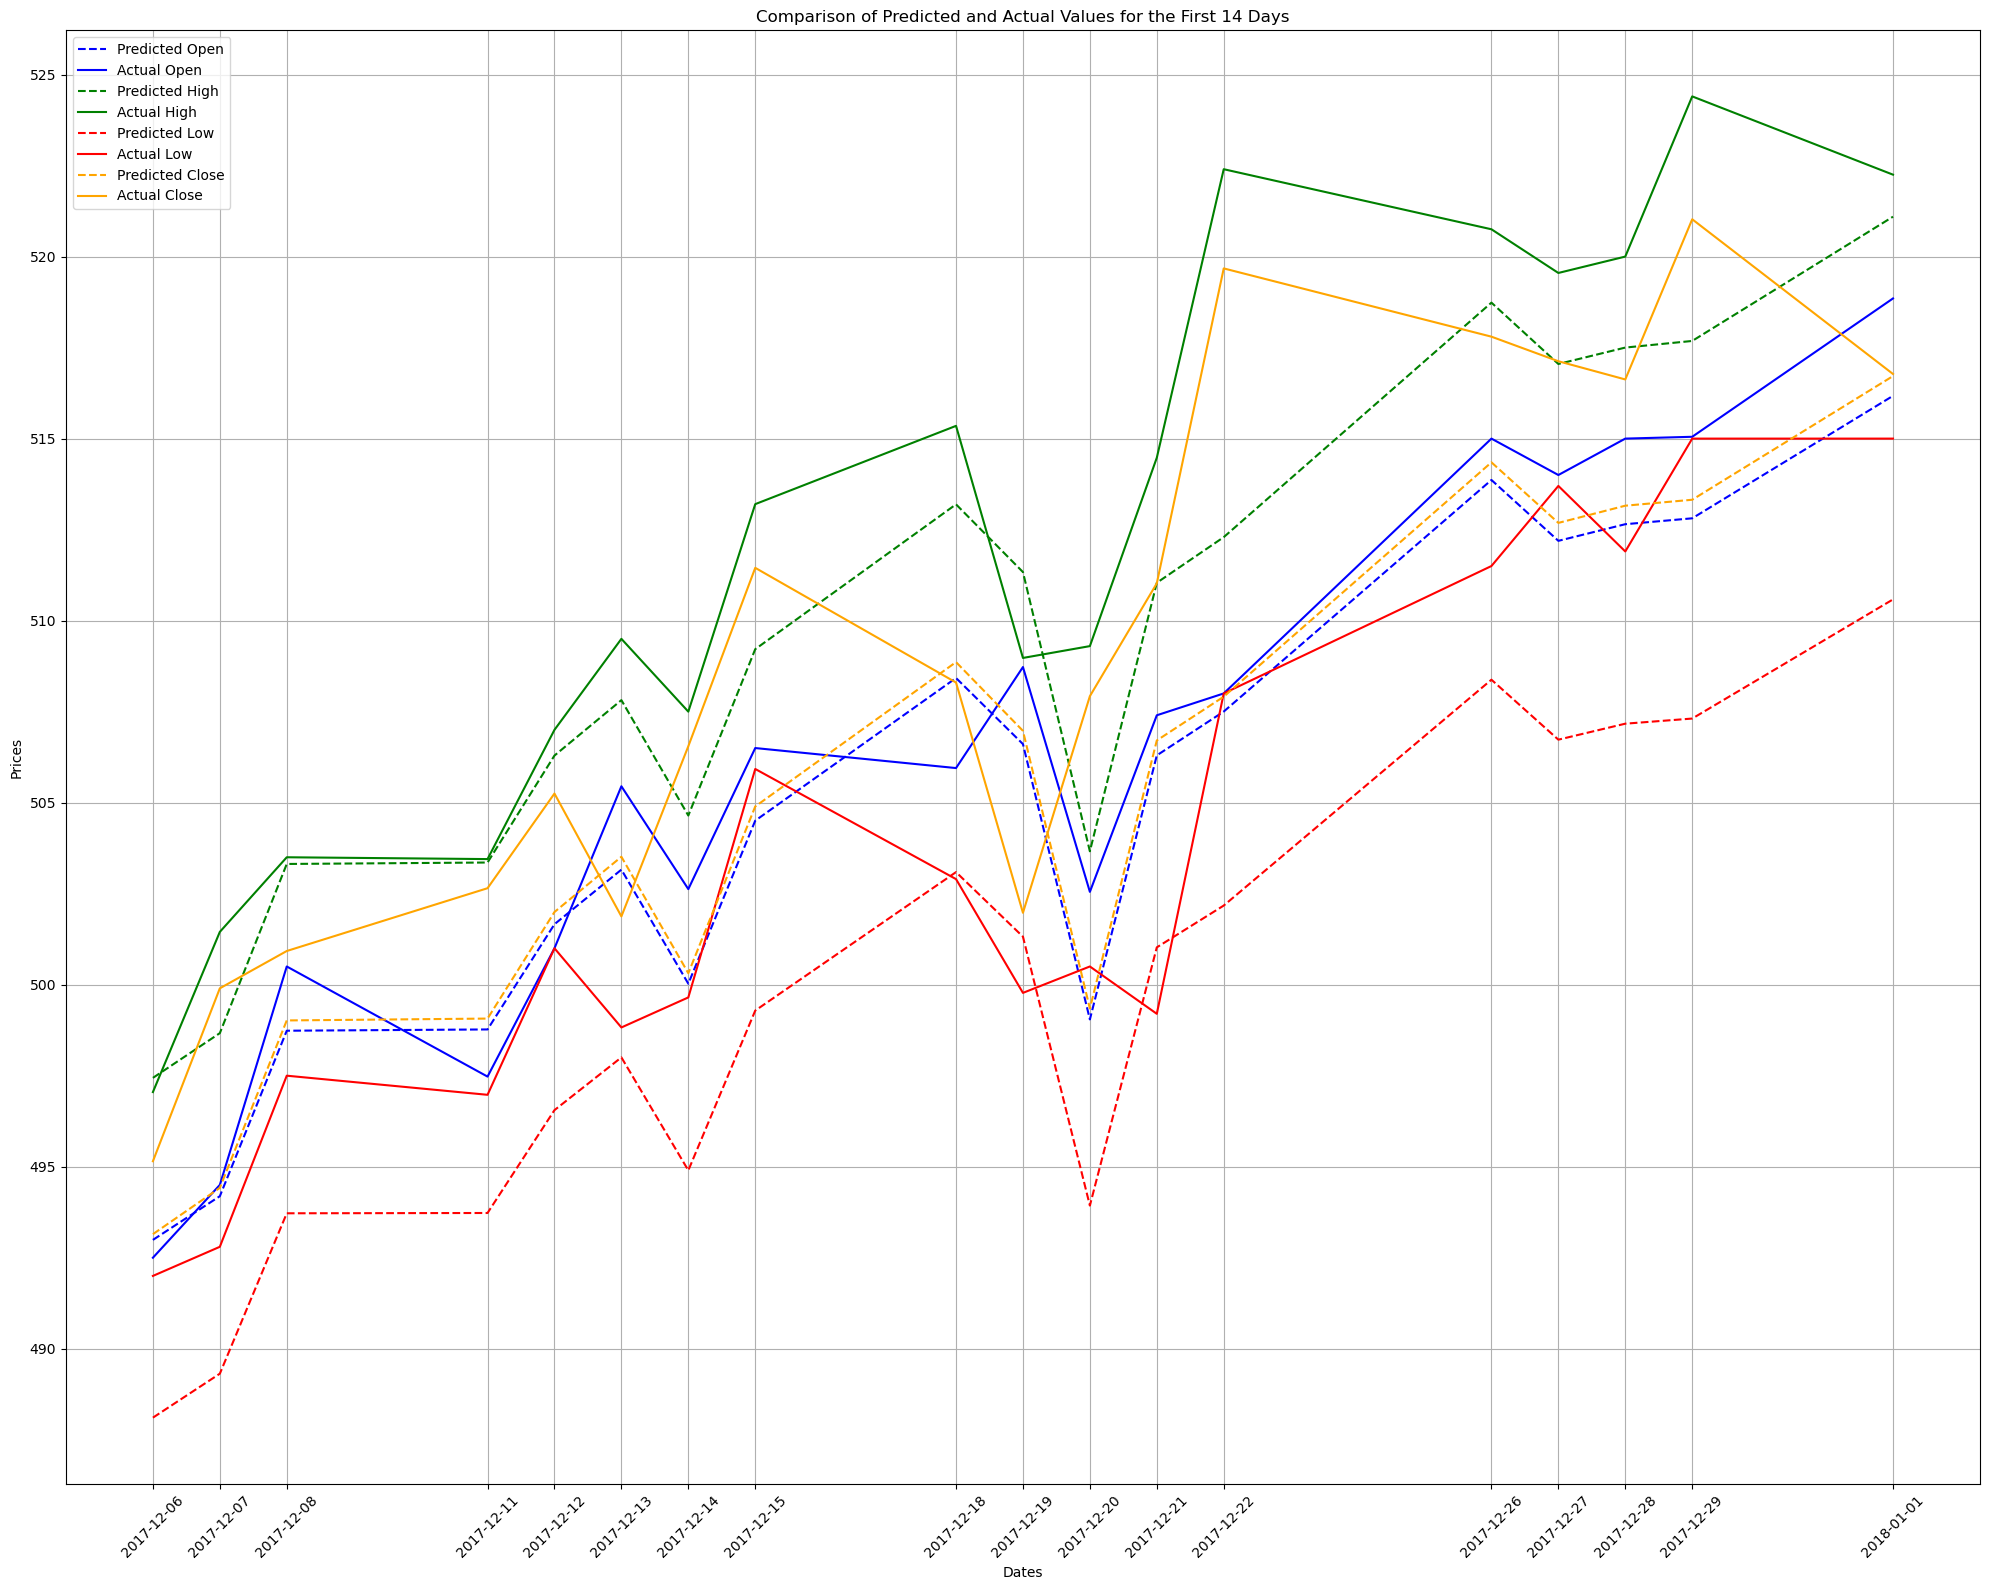

In [310]:
import matplotlib.pyplot as plt

# Dictionary to map index to category
dict_i = {
    0: 'Open',
    1: 'High',
    2: 'Low',
    3: 'Close'
}

# Define colors for each category (Open, High, Low, Close)
colors = ['blue', 'green', 'red', 'orange', 'blue', 'green', 'red', 'orange']

# Indices for the first 14 days (0 to 13)
selected_days = list(range(18))

# Create the figure
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed

# Plot predicted and actual values for the first 14 days
for i in range(4):  # Iterate through Open, High, Low, Close
    plt.plot(
        [dates_set6_test[j] for j in selected_days],
        [test_set6_predictions[j, i] for j in selected_days],
        label=f'Predicted {dict_i[i]}',
        linestyle='--',
        color=colors[i]
    )
    plt.plot(
        [dates_set6_test[j] for j in selected_days],
        [y_set6_test[j, i] for j in selected_days],
        label=f'Actual {dict_i[i]}',
        linestyle='-',
        color=colors[i + 4]
    )

plt.title('Comparison of Predicted and Actual Values for the First 14 Days')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks([dates_set6_test[j] for j in selected_days], rotation=45)  # Ensure all dates are displayed and rotated for readability
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [563]:
from tabulate import tabulate

# Function to calculate delta and delta percentage
def calculate_delta(pred, actual):
    delta = pred - actual
    delta_percent = (delta / actual) * 100
    return delta, delta_percent

# Preparing the table data
table_data = []
for i in range(14):
    date = dates_test[i]
    pred_open, pred_high, pred_low, pred_close = recursive_predictions[i]
    act_open, act_high, act_low, act_close = y_test[i]
    
    delta_open, delta_open_percent = calculate_delta(pred_open, act_open)
    delta_high, delta_high_percent = calculate_delta(pred_high, act_high)
    delta_low, delta_low_percent = calculate_delta(pred_low, act_low)
    delta_close, delta_close_percent = calculate_delta(pred_close, act_close)
    
    table_data.append([date, pred_open, act_open, delta_open, delta_open_percent,
                       pred_high, act_high, delta_high, delta_high_percent,
                       pred_low, act_low, delta_low, delta_low_percent,
                       pred_close, act_close, delta_close, delta_close_percent])

# Define table headers
headers = ["Date", "Predicted Open", "Actual Open", "Delta Open", "Delta Open%", 
           "Predicted High", "Actual High", "Delta High", "Delta High%", 
           "Predicted Low", "Actual Low", "Delta Low", "Delta Low%", 
           "Predicted Close", "Actual Close", "Delta Close", "Delta Close%"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid", floatfmt=".2f"))

+---------------------+------------------+---------------+--------------+---------------+------------------+---------------+--------------+---------------+-----------------+--------------+-------------+--------------+-------------------+----------------+---------------+----------------+
| Date                |   Predicted Open |   Actual Open |   Delta Open |   Delta Open% |   Predicted High |   Actual High |   Delta High |   Delta High% |   Predicted Low |   Actual Low |   Delta Low |   Delta Low% |   Predicted Close |   Actual Close |   Delta Close |   Delta Close% |
+=====================+==================+===============+==============+===============+==================+===============+==============+===============+=================+==============+=============+==============+===================+================+===============+================+
| 2017-03-17 00:00:00 |           586.93 |        517.70 |        69.23 |         13.37 |           595.18 |        521.45 |        73.7

#### **Checkpoint - Saving the Deep Neural Network Model**

In [517]:
import pickle
import h5py

def save_model(model_lstm_v2, pickle_filename, h5_filename):
    # Save as pickle
    with open(pickle_filename, 'wb') as f:
        pickle.dump(model_lstm_v2, f)
    
    # Save as HDF5
    model_lstm_v2.save(h5_filename)

pickle_file_path_lstm_v2 = os.path.join(config.BASE_DIR, 'models', 'model_lstm_v2.pkl')
h5_file_path_lstm_v2 = os.path.join(config.BASE_DIR, 'models', 'model_lstm_v2.h5')

# Save the model
save_model(model, pickle_file_path_lstm_v2, h5_file_path_lstm_v2)

#### **Load the LSTM_V2 Model**

In [380]:
import pickle

pickle_file_path_lstm_v2 = os.path.join(config.BASE_DIR, 'models', 'model_lstm_v2.pkl')
h5_file_path_lstm_v2 = os.path.join(config.BASE_DIR, 'models', 'model_lstm_v2.h5')

def load_model_from_pickle(pickle_file_path_lstm_v2):
    with open(pickle_file_path_lstm_v2, 'rb') as f:
        model = pickle.load(f)
    return model

# Load model from pickle file
model = load_model_from_pickle(pickle_file_path_lstm_v2)

In [356]:
pickle_file_path_lstm_v2 = os.path.join(config.BASE_DIR, 'models', 'model_lstm_v2.pkl')
h5_file_path_lstm_v2 = os.path.join(config.BASE_DIR, 'models', 'model_lstm_v2.h5')

def load_model_from_h5(h5_file_path_lstm_v2):
    return h5py.File(h5_file_path_lstm_v2, 'r')

# Load model from HDF5 file
model = load_model_from_h5(h5_file_path_lstm_v2)

NameError: name 'h5py' is not defined